# Data cleaning

In [1]:
import polars as pl
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 

dataPath = "/kaggle/input/home-credit-credit-risk-model-stability/"

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
feature_def = pl.read_csv(dataPath + 'feature_definitions.csv').to_pandas()
feature_def

,Variable,Description
0,actualdpd_943P,Days Past Due (DPD) of previous contract (actual).
1,actualdpdtolerance_344P,DPD of client with tolerance.
2,addres_district_368M,District of the person's address.
3,addres_role_871L,Role of person's address.
4,addres_zip_823M,Zip code of the address.
5,amount_1115A,Credit amount of the active contract provided by the credit bureau.
6,amount_416A,Deposit amount.
7,amount_4527230A,Tax deductions amount tracked by the government registry.
8,amount_4917619A,Tax deductions amount tracked by the government registry.
9,amtdebitincoming_4809443A,Incoming debit card transactions amount.


## train_credit_bureau_a_1_X

In [3]:
def prcess_train_credit_bureau_a_1_X(id):
    df = pl.read_csv(dataPath + f"csv_files/train/train_credit_bureau_a_1_{id}.csv")
    df = df.sort(['case_id', 'num_group1'])

    agg_df = df.group_by('case_id').agg(
        classificationofcontr_13M=pl.col('classificationofcontr_13M').first(),
        classificationofcontr_400M=pl.col('classificationofcontr_400M').first(),
        contractst_545M=pl.col('contractst_545M').first(),
        contractst_964M=pl.col('contractst_964M').first(),
        credlmt_935A=pl.col('credlmt_935A').max(),
        dateofcredend_289D=pl.col('dateofcredend_289D').first(),
        dateofcredstart_739D=pl.col('dateofcredstart_739D').first(),
        debtoutstand_525A=pl.col('debtoutstand_525A').max(),
        debtoverdue_47A=pl.col('debtoverdue_47A').max(),
        dpdmax_139P=pl.col('dpdmax_139P').max(),
        financialinstitution_382M=pl.col('financialinstitution_382M').first(),
        financialinstitution_591M=pl.col('financialinstitution_591M').first(),
        instlamount_768A=pl.col('instlamount_768A').max(),
        lastupdate_1112D=pl.col('lastupdate_1112D').max(),
        monthlyinstlamount_332A=pl.col('monthlyinstlamount_332A').first(),
        nominalrate_281L=pl.col('nominalrate_281L').first(),
        numberofcontrsvalue_258L=pl.col('numberofcontrsvalue_258L').max(),
        numberofcontrsvalue_358L=pl.col('numberofcontrsvalue_358L').max(),
        numberofinstls_320L=pl.col('numberofinstls_320L').max(),
        numberofoutstandinstls_59L=pl.col('numberofoutstandinstls_59L').max(),
        numberofoverdueinstlmax_1039L=pl.col('numberofoverdueinstlmax_1039L').max(),
        numberofoverdueinstls_725L=pl.col('numberofoverdueinstls_725L').max(),
        outstandingamount_362A=pl.col('outstandingamount_362A').max(),
        overdueamount_659A=pl.col('overdueamount_659A').max(),
        overdueamountmax2_14A=pl.col('overdueamountmax2_14A').max(),
        overdueamountmax2_398A=pl.col('overdueamountmax2_398A').max(),
        overdueamountmax2date_1002D=pl.col('overdueamountmax2date_1002D').first(),
        overdueamountmax2date_1142D=pl.col('overdueamountmax2date_1142D').first(),
        overdueamountmax_155A=pl.col('overdueamountmax_155A').max(),
        overdueamountmax_35A=pl.col('overdueamountmax_35A').max(),
        overdueamountmaxdatemonth_284T=pl.col('overdueamountmaxdatemonth_284T').max(),
        overdueamountmaxdatemonth_365T=pl.col('overdueamountmaxdatemonth_365T').max(),
        overdueamountmaxdateyear_2T=pl.col('overdueamountmaxdateyear_2T').max(),
        overdueamountmaxdateyear_994T=pl.col('overdueamountmaxdateyear_994T').max(),
        purposeofcred_426M=pl.col('purposeofcred_426M').first(),
        purposeofcred_874M=pl.col('purposeofcred_874M').first(),
        residualamount_856A=pl.col('residualamount_856A').max(),
        subjectrole_182M=pl.col('subjectrole_182M').first(),
        subjectrole_93M=pl.col('subjectrole_93M').first(),
        totalamount_996A=pl.col('totalamount_996A').max(),
        totaldebtoverduevalue_178A=pl.col('totaldebtoverduevalue_178A').max(),
        totaldebtoverduevalue_718A=pl.col('totaldebtoverduevalue_718A').max(),
        totaloutstanddebtvalue_39A=pl.col('totaloutstanddebtvalue_39A').max()
    )
    
    return agg_df

In [4]:
# process all data (train_credit_bureau_a_1_0, train_credit_bureau_a_1_1, train_credit_bureau_a_1_2, train_credit_bureau_a_1_3)

processed_dfs = []
for i in range (4):
    df = prcess_train_credit_bureau_a_1_X(i)
    processed_dfs.append(df)

In [5]:
_train_credit_bureau_a_1 = pl.concat(processed_dfs, how="vertical_relaxed",)
_train_credit_bureau_a_1

case_id,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,credlmt_935A,dateofcredend_289D,dateofcredstart_739D,debtoutstand_525A,debtoverdue_47A,dpdmax_139P,financialinstitution_382M,financialinstitution_591M,instlamount_768A,lastupdate_1112D,monthlyinstlamount_332A,nominalrate_281L,numberofcontrsvalue_258L,numberofcontrsvalue_358L,numberofinstls_320L,numberofoutstandinstls_59L,numberofoverdueinstlmax_1039L,numberofoverdueinstls_725L,outstandingamount_362A,overdueamount_659A,overdueamountmax2_14A,overdueamountmax2_398A,overdueamountmax2date_1002D,overdueamountmax2date_1142D,overdueamountmax_155A,overdueamountmax_35A,overdueamountmaxdatemonth_284T,overdueamountmaxdatemonth_365T,overdueamountmaxdateyear_2T,overdueamountmaxdateyear_994T,purposeofcred_426M,purposeofcred_874M,residualamount_856A,subjectrole_182M,subjectrole_93M,totalamount_996A,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A
i64,str,str,str,str,f64,str,str,f64,f64,f64,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,f64,str,str,f64,f64,str,str,str,f64,str,str,f64,f64,f64,f64
388,"""4408ff0f""","""a55475b1""","""7241344e""","""a55475b1""",135806.0,"""2023-06-20""","""2018-06-20""",374419.5,0.0,0.0,"""a55475b1""","""55b002a9""",8742.8,"""2019-01-24""",7811.4463,null,2.0,1.0,60.0,54.0,0.0,0.0,260093.7,0.0,0.0,null,null,null,0.0,null,null,8.0,2018.0,null,"""96a8fdfe""","""a55475b1""",114325.805,"""ab3c25cf""","""ab3c25cf""",268897.62,0.0,0.0,374419.5
405,"""ea6782cc""","""a55475b1""","""7241344e""","""a55475b1""",0.0,"""2020-06-06""","""2012-06-06""",224467.5,0.0,0.0,"""a55475b1""","""P204_66_73""",0.0,"""2019-01-17""",0.0,null,2.0,null,59.0,46.0,0.0,0.0,224467.5,0.0,0.0,null,null,null,0.0,null,null,11.0,2017.0,null,"""60c73645""","""a55475b1""",0.0,"""ab3c25cf""","""a55475b1""",256000.0,0.0,null,224467.5
409,"""ea6782cc""","""a55475b1""","""7241344e""","""a55475b1""",null,"""2019-09-09""","""2016-09-09""",52079.754,0.0,0.0,"""a55475b1""","""P150_136_157""",null,"""2019-01-08""",5767.622,null,3.0,3.0,35.0,8.0,0.0,0.0,42958.7,0.0,0.0,null,null,null,0.0,null,null,12.0,2018.0,null,"""96a8fdfe""","""a55475b1""",null,"""ab3c25cf""","""ab3c25cf""",150000.0,0.0,0.0,52079.754
410,"""ea6782cc""","""a55475b1""","""7241344e""","""a55475b1""",0.0,"""2019-04-17""","""2017-04-17""",0.0,0.0,0.0,"""a55475b1""","""P204_66_73""",0.0,"""2019-01-11""",0.0,null,1.0,4.0,null,null,0.0,0.0,null,0.0,0.0,null,null,null,0.0,null,null,5.0,2017.0,null,"""60c73645""","""a55475b1""",0.0,"""ab3c25cf""","""ab3c25cf""",null,0.0,0.0,0.0
411,"""ea6782cc""","""a55475b1""","""7241344e""","""a55475b1""",160000.0,"""2020-09-25""","""2012-09-25""",347346.88,0.0,13.0,"""a55475b1""","""P204_66_73""",7050.4,"""2019-01-21""",7050.4,null,4.0,2.0,48.0,34.0,27.0,0.0,82136.86,0.0,3738.8699,null,null,"""2013-10-28""",3.3740003,null,null,11.0,2018.0,null,"""60c73645""","""a55475b1""",108604.69,"""ab3c25cf""","""ab3c25cf""",100000.0,0.0,0.0,347346.88
414,"""ea6782cc""","""a55475b1""","""7241344e""","""a55475b1""",35896.0,"""2020-06-14""","""2018-06-14""",47580.582,0.0,0.0,"""a55475b1""","""P204_66_73""",3767.0,"""2019-01-13""",3767.0,null,2.0,4.0,12.0,8.0,0.0,0.0,28524.639,0.0,0.0,null,null,null,0.0,null,null,10.0,2018.0,null,"""60c73645""","""a55475b1""",19055.945,"""ab3c25cf""","""ab3c25cf""",40000.0,0.0,0.0,47580.582
415,"""ea6782cc""","""a55475b1""","""7241344e""","""a55475b1""",0.0,"""2020-03-21""","""2016-03-21""",0.0,0.0,0.0,"""a55475b1""","""P204_66_73""",0.0,"""2019-01-11""",0.0,null,1.0,4.0,null,null,0.0,0.0,null,0.0,0.0,null,null,null,0.0,null,null,2.0,2017.0,null,"""60c73645""","""a55475b1""",0.0,"""ab3c25cf""","""ab3c25cf""",null,0.0,0.0,0.0
416,"""ea6782cc""","""a55475b1""","""7241344e""","""a55475b1""",17058.0,"""2019-06-07""","""2015-06-07""",5928.736,0.0,0.0,"""a55475b1""","""P204_66_73""",1088.0,"""2019-01-11""",1088.0,null,1.0,2.0,null,null,0.0,0.0,null,0.0,0.0,null,null,null,0.0,null,null,2.0,2017.0,null,"""60c

## train_credit_bureau_a_2_X

In [6]:
def prcess_train_credit_bureau_a_2_X(id):
    df = pl.read_csv(dataPath + f"csv_files/train/train_credit_bureau_a_2_{id}.csv")
    df = df.sort(['case_id', 'num_group1', 'num_group2'])
    
    agg_df = df.group_by('case_id').agg(
        collater_valueofguarantee_1124L=pl.col('collater_valueofguarantee_1124L').max(),
        pmts_dpd_1073P=pl.col('pmts_dpd_1073P').sum(),
        pmts_overdue_1140A=pl.col('pmts_overdue_1140A').sum(),
        min_pmts_year_1139T=pl.col('pmts_year_1139T').min(),
        max_pmts_year_1139T=pl.col('pmts_year_1139T').max(),
        num_of_contracts=pl.col('num_group1').max(),
        collater_typofvalofguarant_298M=pl.col('collater_typofvalofguarant_298M').first(),
        collaterals_typeofguarante_669M=pl.col('collaterals_typeofguarante_669M').first(),
        subjectroles_name_838M=pl.col('subjectroles_name_838M').first()
    )
    
    return agg_df

In [7]:
# process all data (from train_credit_bureau_a_2_0 to train_credit_bureau_a_2_10

processed_dfs = []
for i in range (11):
    df = prcess_train_credit_bureau_a_2_X(i)
    processed_dfs.append(df)

In [8]:
_train_credit_bureau_a_2 = pl.concat(processed_dfs, how="vertical_relaxed",)
_train_credit_bureau_a_2

case_id,collater_valueofguarantee_1124L,pmts_dpd_1073P,pmts_overdue_1140A,min_pmts_year_1139T,max_pmts_year_1139T,num_of_contracts,collater_typofvalofguarant_298M,collaterals_typeofguarante_669M,subjectroles_name_838M
i64,str,str,str,str,str,i64,str,str,str
388,"""0.0""","""0.0""","""0.0""","""2018.0""","""2020.0""",1,"""8fd95e4b""","""c7a5ad39""","""ab3c25cf"""
405,"""0.0""","""0.0""","""0.0""","""2017.0""","""2020.0""",1,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""
409,"""0.0""","""0.0""","""0.0""","""2017.0""","""2019.0""",2,"""8fd95e4b""","""c7a5ad39""","""ab3c25cf"""
410,"""0.0""","""0.0""","""0.0""","""2017.0""","""2019.0""",0,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""
411,"""0.0""","""13.0""","""3.3740003""","""2017.0""","""2020.0""",3,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""
414,"""0.0""","""0.0""","""0.0""","""2018.0""","""2019.0""",1,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""
415,"""0.0""","""0.0""","""0.0""","""2017.0""","""2019.0""",0,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""
416,"""0.0""","""0.0""","""0.0""","""2017.0""","""2019.0""",0,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""
417,"""5186500.0""","""0.0""","""0.0""","""2017.0""","""2019.0""",1,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""


## train_debitcard_1

In [9]:
df = pl.read_csv(dataPath + 'csv_files/train/train_debitcard_1.csv')

_train_debitcard_1 = df.group_by('case_id').agg(
    num_of_debit_cards_opened=pl.col('openingdate_857D').count(),
    first_opening_date=pl.col('openingdate_857D').min(),
    last_opening_date=pl.col('openingdate_857D').max()
)

In [10]:
_train_debitcard_1

case_id,num_of_debit_cards_opened,first_opening_date,last_opening_date
i64,u32,str,str
1757853,1,"""2014-07-15""","""2014-07-15"""
2573364,1,"""2016-08-27""","""2016-08-27"""
1642569,1,"""2014-02-17""","""2014-02-17"""
654536,1,"""2014-09-03""","""2014-09-03"""
864497,1,"""2015-06-05""","""2015-06-05"""
1506400,1,"""2016-04-15""","""2016-04-15"""
2658973,2,"""2014-08-05""","""2017-01-05"""
2692742,2,"""2014-03-28""","""2016-04-11"""
1272064,1,"""2015-06-04""","""2015-06-04"""


## train_deposit_1

In [11]:
df = pl.read_csv(dataPath + 'csv_files/train/train_deposit_1.csv')

_train_deposit_1 = df.group_by('case_id').agg(
    sum_amount_416A=pl.col('amount_416A').sum(),
    avg_amount_416A=pl.col('amount_416A').mean(),
    contractenddate_991D=pl.col('contractenddate_991D').max(),
    min_openingdate_313D=pl.col('openingdate_313D').min(),
    num_of_openingdate_313D=pl.col('num_group1').max()
)

In [12]:
_train_deposit_1

case_id,sum_amount_416A,avg_amount_416A,contractenddate_991D,min_openingdate_313D,num_of_openingdate_313D
i64,f64,f64,str,str,i64
1690331,5232.366,2616.183,"""2018-09-24""","""2015-09-25""",1
2654769,495.44801,247.724005,"""2017-10-16""","""2014-10-17""",1
950943,204.088,204.088,"""2018-02-22""","""2016-02-22""",0
2664922,254.10802,254.10802,"""2018-05-21""","""2015-05-22""",0
2606963,0.0,0.0,null,"""2016-03-23""",0
113706,272.174,272.174,"""2018-12-18""","""2014-06-19""",0
111318,0.0,0.0,null,"""2016-03-02""",0
143738,600.582,600.582,null,"""2017-07-27""",0
873706,0.0,0.0,null,"""2014-01-07""",0


## train_person_1

In [13]:
df = pl.read_csv(dataPath + 'csv_files/train/train_person_1.csv')
df = df.sort(['case_id', 'num_group1'])

_train_person_1 = df.group_by('case_id').agg(
    birth_259D=pl.col('birth_259D').first(),
    childnum_185L=pl.col('childnum_185L').max(),
    contaddr_district_15M=pl.col('contaddr_district_15M').first(),
    education_927M=pl.col('education_927M').first(),
    empl_employedfrom_271D=pl.col('empl_employedfrom_271D').first(),
    empl_industry_691L=pl.col('empl_industry_691L').first(),
    empladdr_district_926M=pl.col('empladdr_district_926M').first(),
    familystate_447L=pl.col('familystate_447L').first(),
    incometype_1044T=pl.col('incometype_1044T').first(),
    language1_981M=pl.col('language1_981M').first(),
    mainoccupationinc_384A=pl.col('mainoccupationinc_384A').max(),
    registaddr_district_1083M=pl.col('registaddr_district_1083M').first(),
    relationshiptoclient_415T=pl.col('relationshiptoclient_415T').first(),
    relationshiptoclient_642T=pl.col('relationshiptoclient_642T').first(),
    role_1084L=pl.col('role_1084L').first(),
    sex_738L=pl.col('sex_738L').first()
)
_train_person_1

case_id,birth_259D,childnum_185L,contaddr_district_15M,education_927M,empl_employedfrom_271D,empl_industry_691L,empladdr_district_926M,familystate_447L,incometype_1044T,language1_981M,mainoccupationinc_384A,registaddr_district_1083M,relationshiptoclient_415T,relationshiptoclient_642T,role_1084L,sex_738L
i64,str,f64,str,str,str,str,str,str,str,str,f64,str,str,str,str,str
0,"""1986-07-01""",null,"""P88_18_84""","""P97_36_170""","""2017-09-15""","""OTHER""","""P142_57_166""","""MARRIED""","""SALARIED_GOVT""","""P10_39_147""",10800.0,"""P88_18_84""",null,null,"""CL""","""F"""
1,"""1957-08-01""",null,"""P103_93_94""","""P97_36_170""","""2008-10-29""","""OTHER""","""P49_46_174""","""DIVORCED""","""SALARIED_GOVT""","""P10_39_147""",10000.0,"""P103_93_94""",null,null,"""CL""","""M"""
2,"""1974-12-01""",null,"""P91_125_184""","""P97_36_170""","""2010-02-15""","""OTHER""","""P63_14_24""","""MARRIED""","""EMPLOYED""","""P10_39_147""",14000.0,"""P91_125_184""",null,null,"""EM""","""F"""
3,"""1993-08-01""",null,"""P155_139_77""","""P33_146_175""","""2018-05-15""","""OTHER""","""P131_33_167""","""MARRIED""","""EMPLOYED""","""P10_39_147""",10000.0,"""P155_139_77""",null,null,"""CL""","""F"""
4,"""1994-01-01""",null,"""P194_82_174""","""P33_146_175""","""2014-12-15""","""OTHER""","""P62_144_102""","""MARRIED""","""EMPLOYED""","""P10_39_147""",24000.0,"""P194_82_174""",null,null,"""CL""","""F"""
5,"""1979-10-01""",null,"""P54_133_26""","""P97_36_170""","""2016-01-15""","""OTHER""","""P54_133_26""","""MARRIED""","""PRIVATE_SECTOR…","""P209_127_106""",64000.0,"""P54_133_26""",null,null,"""CL""","""F"""
6,"""1991-01-01""",0.0,"""P82_154_182""","""P97_36_170""","""2013-09-15""","""EDUCATION""","""P82_154_182""","""SINGLE""","""EMPLOYED""","""P10_39_147""",20000.0,"""P112_89_137""",null,null,"""CL""","""F"""
7,"""1993-09-01""",null,"""P170_34_169""","""P33_146_175""","""2018-09-15""","""EDUCATION""","""P54_133_26""","""SINGLE""","""SALARIED_GOVT""","""P209_127_106""",46000.0,"""P170_34_169""",null,null,"""EM""","""F"""
8,"""1982-11-01""",null,"""P93_57_167""","""P97_36_170""","""2016-05-15""","""OTHER""","""P109_162_152""","""MARRIED""","""EMPLOYED""","""P10_39_147""",90000.0,"""P93_57_167""",null,null,"""EM""","""M"""


## train_tax_registry_X_1

In [14]:
train_tax_registry_a_1 = pl.read_csv(dataPath + "csv_files/train/train_tax_registry_a_1.csv")
train_tax_registry_b_1 = pl.read_csv(dataPath + "csv_files/train/train_tax_registry_b_1.csv")
train_tax_registry_c_1 = pl.read_csv(dataPath + "csv_files/train/train_tax_registry_c_1.csv")

_train_tax_registry_a_1 = train_tax_registry_a_1.group_by('case_id').agg(
    max_recorddate_4527225D=pl.col('recorddate_4527225D').max(),
    sum_amount_4527230A=pl.col('amount_4527230A').sum()
)

_train_tax_registry_b_1 = train_tax_registry_b_1.group_by('case_id').agg(
    max_deductiondate_4917603D=pl.col('deductiondate_4917603D').max(),
    sum_amount_4917619A=pl.col('amount_4917619A').sum()
)

_train_tax_registry_c_1 = train_tax_registry_c_1.group_by('case_id').agg(
    max_processingdate_168D=pl.col('processingdate_168D').max(),
    sum_pmtamount_36A=pl.col('pmtamount_36A').sum()
)

In [15]:
_train_tax_registry_a_1

case_id,max_recorddate_4527225D,sum_amount_4527230A
i64,str,f64
963772,"""2020-03-10""",24100.0
2632880,"""2019-11-01""",4000.0
161232,"""2019-10-06""",17036.8001
169110,"""2019-11-04""",31200.0
808944,"""2019-10-05""",16504.6001
911705,"""2020-01-09""",15433.8001
1746953,"""2020-01-26""",4000.0
925850,"""2020-01-18""",1700.0
968104,"""2020-03-20""",12000.0


In [16]:
_train_tax_registry_b_1

case_id,max_deductiondate_4917603D,sum_amount_4917619A
i64,str,f64
1012165,"""2020-08-04""",27540.0
2683953,"""2020-06-22""",63585.0
1855907,"""2020-06-11""",96111.403
1015279,"""2020-09-07""",213456.203
1026545,"""2020-09-15""",30572.0
1865985,"""2020-06-12""",154004.001
235239,"""2020-06-25""",36238.2001
1937663,"""2020-09-23""",137951.202
1847767,"""2020-05-11""",104397.801


In [17]:
_train_tax_registry_c_1

case_id,max_processingdate_168D,sum_pmtamount_36A
i64,str,f64
2565894,"""2019-04-12""",16436.4762
1355913,"""2019-04-30""",28435.32
803046,"""2019-09-29""",6000.0
1511795,"""2019-09-12""",10407.40012
642323,"""2019-03-07""",4500.0
743792,"""2019-07-08""",153365.8155
766634,"""2019-08-06""",8600.0
1267449,"""2019-02-05""",11469.2
1424641,"""2019-07-09""",4850.0


## train_static, train_static_cb_1

### TODO: Static dataset has 150+ features, try to drop the ones which are likely useless! If you're not sure about a column let's jut keep it for now. We will do a second round of cleaning on the joined dataset (df_train)

In [18]:
_train_static = train_static = pl.concat(
    [
        pl.read_csv(dataPath + "csv_files/train/train_static_0_0.csv"),
        pl.read_csv(dataPath + "csv_files/train/train_static_0_1.csv")
    ],
    how="vertical_relaxed",
)
_train_static_cb = pl.read_csv(dataPath + "csv_files/train/train_static_cb_0.csv")

In [19]:
_train_static

case_id,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgmaxdpdlast9m_3716943P,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,bankacctype_710L,cardtype_51L,clientscnt12m_3712952L,clientscnt3m_3712950L,clientscnt6m_3712949L,clientscnt_100L,clientscnt_1022L,clientscnt_1071L,clientscnt_1130L,clientscnt_136L,clientscnt_157L,clientscnt_257L,clientscnt_304L,clientscnt_360L,clientscnt_493L,clientscnt_533L,clientscnt_887L,…,numinstpaidearlyest_4493214L,numinstpaidlastcontr_4325080L,numinstpaidlate1d_3546852L,numinstregularpaid_973L,numinstregularpaidest_4493210L,numinsttopaygr_769L,numinsttopaygrest_4493213L,numinstunpaidmax_3546851L,numinstunpaidmaxest_4493212L,numnotactivated_1143L,numpmtchanneldd_318L,numrejects9m_859L,opencred_647L,paytype1st_925L,paytype_783L,payvacationpostpone_4187118D,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,previouscontdistrict_112M,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D
i64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,str,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,…,str,str,f64,f64,str,f64,str,f64,str,f64,f64,f64,bool,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,str,f64,f64,str,str,str,str
0,null,null,1917.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,null,"""OTHER""","""OTHER""",null,null,null,null,null,null,24.0,0.0,0.0,null,"""a55475b1""",null,0.0,0.0,null,null,0.0,0.0,null,"""BO""",null,null
1,null,null,3134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0.0""",3.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,null,"""OTHER""","""OTHER""",null,null,null,null,null,null,18.0,0.0,0.0,null,"""a55475b1""",null,0.0,0.0,null,null,0.0,0.0,null,"""BO""",null,null
2,null,null,4937.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,false,"""OTHER""","""OTHER""",null,null,null,null,null,null,36.0,0.0,0.0,null,"""a55475b1""",null,0.0,0.0,null,null,0.0,0.0,null,"""BO""","""AL""",null
3,null,null,4643.6,0.0,0.0,1.0,0.0,2.0,0.0,1.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,1.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,1.0,false,"""OTHER""","""OTHER""",null,null,null,null,null,null,12.0,0.0,0.0,null,"""a55475b1""",null,1.0,1.0,null,null,0.0,0.0,null,"""BO""","""AL""",null
4,null,null,3390.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,false,"""OTHER""","""OTHER""",null,null,null,null,null,null,24.0,0.0,0.0,null,"""a55475b1""",null,0.0,0.0,null,null,0.0,0.0,null,"""BO""","""AL""",null
5,null,null,3600.0,0.0,0.0,1.0,0.0,8.0,2.0,1.0,null,null,null,null,null,null,null,null,null,null,"""INSTANT""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,2.0,…,null,null,null,null,null,null,null,null,null,0.0,

In [20]:
_train_static_cb 

case_id,assignmentdate_238D,assignmentdate_4527235D,assignmentdate_4955616D,birthdate_574D,contractssum_5085716L,dateofbirth_337D,dateofbirth_342D,days120_123L,days180_256L,days30_165L,days360_512L,days90_310L,description_5085714M,education_1103M,education_88M,firstquarter_103L,for3years_128L,for3years_504L,for3years_584L,formonth_118L,formonth_206L,formonth_535L,forquarter_1017L,forquarter_462L,forquarter_634L,fortoday_1092L,forweek_1077L,forweek_528L,forweek_601L,foryear_618L,foryear_818L,foryear_850L,fourthquarter_440L,maritalst_385M,maritalst_893M,numberofqueries_373L,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtcount_4527229L,pmtcount_4955617L,pmtcount_693L,pmtscount_423L,pmtssum_45A,requesttype_4525192L,responsedate_1012D,responsedate_4527233D,responsedate_4917613D,riskassesment_302T,riskassesment_940T,secondquarter_766L,thirdquarter_1082L
i64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,str,str,str,str,f64,f64,f64,str,str,str,str,str,f64,f64,f64
357,null,null,null,"""1988-04-01""",null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,6.0,6301.4,null,"""2019-01-25""",null,null,null,null,null,null
381,null,null,null,"""1973-11-01""",null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,6.0,4019.6,null,"""2019-01-25""",null,null,null,null,null,null
388,null,null,null,"""1989-04-01""",null,"""1989-04-01""",null,6.0,8.0,2.0,10.0,4.0,"""a55475b1""","""a55475b1""","""a55475b1""",2.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,6.0,"""a55475b1""","""a55475b1""",10.0,null,null,null,null,null,null,6.0,14548.0,null,"""2019-01-28""",null,null,null,null,3.0,5.0
405,null,null,null,"""1974-03-01""",null,"""1974-03-01""",null,0.0,0.0,0.0,1.0,0.0,"""a55475b1""","""a55475b1""","""a55475b1""",0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,4.0,"""a55475b1""","""a55475b1""",1.0,null,null,null,null,null,null,6.0,10498.24,null,"""2019-01-21""",null,null,null,null,2.0,0.0
409,null,null,null,"""1993-06-01""",null,"""1993-06-01""",null,2.0,3.0,0.0,3.0,1.0,"""a55475b1""","""717ddd49""","""a55475b1""",4.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1.0,"""a7fcb6e5""","""a55475b1""",3.0,null,null,null,null,null,null,7.0,6344.8804,null,"""2019-01-21""",null,null,null,null,0.0,4.0
410,null,null,null,"""1978-06-01""",null,"""1978-06-01""",null,2.0,2.0,2.0,3.0,2.0,"""a55475b1""","""6b2ae0fa""","""a55475b1""",2.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.0,"""3439d993""","""a55475b1""",3.0,null,null,null,null,null,null,12.0,7200.0,null,"""2019-01-22""",null,null,null,null,3.0,6.0
411,"""2017-07-06""",null,null,"""1959-07-01""",null,"""1959-07-01""",null,9.0,9.0,4.0,20.0,7.0,"""a55475b1""","""a55475b1""","""a55475b1""",6.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,20.0,"""a55475b1""","""a55475b1""",20.0,5413.3335,null,null,null,null,5.0,null,null,null,"""2019-01-22""",null,null,null,null,9.0,2.0
412,null,null,null,"""1969-01-01""",null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,7.0,6284.0,null,"""2019-01-22""",null,null,null,null,null,null
413,"""2013-12-25""",null,null,"""1955-12-01""",null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,n

## Join all tables

In [21]:
train_base = pl.read_csv(dataPath + "csv_files/train/train_base.csv")

df_train = train_base.join(
    _train_credit_bureau_a_1, how="left", on="case_id"
).join(
    _train_credit_bureau_a_2, how="left", on="case_id"
).join(
    _train_debitcard_1, how="left", on="case_id"
).join(
    _train_deposit_1, how="left", on="case_id"
).join(
    _train_person_1, how="left", on="case_id"
).join(
    _train_tax_registry_a_1, how="left", on="case_id"
).join(
    _train_tax_registry_b_1, how="left", on="case_id"
).join(
    _train_tax_registry_c_1, how="left", on="case_id"
).join(
    _train_static, how="left", on="case_id"
).join(
    _train_static_cb, how="left", on="case_id"
)

df_train

case_id,date_decision,MONTH,WEEK_NUM,target,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,credlmt_935A,dateofcredend_289D,dateofcredstart_739D,debtoutstand_525A,debtoverdue_47A,dpdmax_139P,financialinstitution_382M,financialinstitution_591M,instlamount_768A,lastupdate_1112D,monthlyinstlamount_332A,nominalrate_281L,numberofcontrsvalue_258L,numberofcontrsvalue_358L,numberofinstls_320L,numberofoutstandinstls_59L,numberofoverdueinstlmax_1039L,numberofoverdueinstls_725L,outstandingamount_362A,overdueamount_659A,overdueamountmax2_14A,overdueamountmax2_398A,overdueamountmax2date_1002D,overdueamountmax2date_1142D,overdueamountmax_155A,overdueamountmax_35A,overdueamountmaxdatemonth_284T,overdueamountmaxdatemonth_365T,…,firstquarter_103L,for3years_128L,for3years_504L,for3years_584L,formonth_118L,formonth_206L,formonth_535L,forquarter_1017L,forquarter_462L,forquarter_634L,fortoday_1092L,forweek_1077L,forweek_528L,forweek_601L,foryear_618L,foryear_818L,foryear_850L,fourthquarter_440L,maritalst_385M,maritalst_893M,numberofqueries_373L,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtcount_4527229L,pmtcount_4955617L,pmtcount_693L,pmtscount_423L,pmtssum_45A,requesttype_4525192L,responsedate_1012D,responsedate_4527233D,responsedate_4917613D,riskassesment_302T,riskassesment_940T,secondquarter_766L,thirdquarter_1082L
i64,str,i64,i64,i64,str,str,str,str,f64,str,str,f64,f64,f64,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,f64,str,str,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,str,str,str,str,f64,f64,f64,str,str,str,str,str,f64,f64,f64
0,"""2019-01-03""",201901,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1,"""2019-01-03""",201901,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2,"""2019-01-04""",201901,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3,"""2019-01-03""",201901,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
4,"""2019-01-04""",201901,0,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5,"""2019-01-02""",201901,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
6,"""2019-01-03""",201901,0,0,null,null,null,null,null,null,null,null,nu

# test_credit_bureau_a_1_X

In [22]:
def prcess_test_credit_bureau_a_1_X(id):
    df = pl.read_csv(dataPath + f"csv_files/test/test_credit_bureau_a_1_{id}.csv")
    df = df.sort(['case_id', 'num_group1'])

    agg_df = df.group_by('case_id').agg(
        classificationofcontr_13M=pl.col('classificationofcontr_13M').first(),
        classificationofcontr_400M=pl.col('classificationofcontr_400M').first(),
        contractst_545M=pl.col('contractst_545M').first(),
        contractst_964M=pl.col('contractst_964M').first(),
        credlmt_935A=pl.col('credlmt_935A').max(),
        dateofcredend_289D=pl.col('dateofcredend_289D').first(),
        dateofcredstart_739D=pl.col('dateofcredstart_739D').first(),
        debtoutstand_525A=pl.col('debtoutstand_525A').max(),
        debtoverdue_47A=pl.col('debtoverdue_47A').max(),
        dpdmax_139P=pl.col('dpdmax_139P').max(),
        financialinstitution_382M=pl.col('financialinstitution_382M').first(),
        financialinstitution_591M=pl.col('financialinstitution_591M').first(),
        instlamount_768A=pl.col('instlamount_768A').max(),
        lastupdate_1112D=pl.col('lastupdate_1112D').max(),
        monthlyinstlamount_332A=pl.col('monthlyinstlamount_332A').first(),
        nominalrate_281L=pl.col('nominalrate_281L').first(),
        numberofcontrsvalue_258L=pl.col('numberofcontrsvalue_258L').max(),
        numberofcontrsvalue_358L=pl.col('numberofcontrsvalue_358L').max(),
        numberofinstls_320L=pl.col('numberofinstls_320L').max(),
        numberofoutstandinstls_59L=pl.col('numberofoutstandinstls_59L').max(),
        numberofoverdueinstlmax_1039L=pl.col('numberofoverdueinstlmax_1039L').max(),
        numberofoverdueinstls_725L=pl.col('numberofoverdueinstls_725L').max(),
        outstandingamount_362A=pl.col('outstandingamount_362A').max(),
        overdueamount_659A=pl.col('overdueamount_659A').max(),
        overdueamountmax2_14A=pl.col('overdueamountmax2_14A').max(),
        overdueamountmax2_398A=pl.col('overdueamountmax2_398A').max(),
        overdueamountmax2date_1002D=pl.col('overdueamountmax2date_1002D').first(),
        overdueamountmax2date_1142D=pl.col('overdueamountmax2date_1142D').first(),
        overdueamountmax_155A=pl.col('overdueamountmax_155A').max(),
        overdueamountmax_35A=pl.col('overdueamountmax_35A').max(),
        overdueamountmaxdatemonth_284T=pl.col('overdueamountmaxdatemonth_284T').max(),
        overdueamountmaxdatemonth_365T=pl.col('overdueamountmaxdatemonth_365T').max(),
        overdueamountmaxdateyear_2T=pl.col('overdueamountmaxdateyear_2T').max(),
        overdueamountmaxdateyear_994T=pl.col('overdueamountmaxdateyear_994T').max(),
        purposeofcred_426M=pl.col('purposeofcred_426M').first(),
        purposeofcred_874M=pl.col('purposeofcred_874M').first(),
        residualamount_856A=pl.col('residualamount_856A').max(),
        subjectrole_182M=pl.col('subjectrole_182M').first(),
        subjectrole_93M=pl.col('subjectrole_93M').first(),
        totalamount_996A=pl.col('totalamount_996A').max(),
        totaldebtoverduevalue_178A=pl.col('totaldebtoverduevalue_178A').max(),
        totaldebtoverduevalue_718A=pl.col('totaldebtoverduevalue_718A').max(),
        totaloutstanddebtvalue_39A=pl.col('totaloutstanddebtvalue_39A').max()
    )
    
    return agg_df

In [23]:

processed_dfs = []
for i in range (5):
    df = prcess_test_credit_bureau_a_1_X(i)
    processed_dfs.append(df)

In [24]:
_test_credit_bureau_a_1 = pl.concat(processed_dfs, how="vertical_relaxed",)
_test_credit_bureau_a_1

case_id,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,credlmt_935A,dateofcredend_289D,dateofcredstart_739D,debtoutstand_525A,debtoverdue_47A,dpdmax_139P,financialinstitution_382M,financialinstitution_591M,instlamount_768A,lastupdate_1112D,monthlyinstlamount_332A,nominalrate_281L,numberofcontrsvalue_258L,numberofcontrsvalue_358L,numberofinstls_320L,numberofoutstandinstls_59L,numberofoverdueinstlmax_1039L,numberofoverdueinstls_725L,outstandingamount_362A,overdueamount_659A,overdueamountmax2_14A,overdueamountmax2_398A,overdueamountmax2date_1002D,overdueamountmax2date_1142D,overdueamountmax_155A,overdueamountmax_35A,overdueamountmaxdatemonth_284T,overdueamountmaxdatemonth_365T,overdueamountmaxdateyear_2T,overdueamountmaxdateyear_994T,purposeofcred_426M,purposeofcred_874M,residualamount_856A,subjectrole_182M,subjectrole_93M,totalamount_996A,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A
i64,str,str,str,str,f64,str,str,f64,f64,f64,str,str,f64,str,f64,str,f64,f64,str,str,f64,f64,str,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,str,f64,str,str,str,f64,f64,f64
57551,"""ea6782cc""","""d7416962""","""7241344e""","""7241344e""",600000.0,"""2021-06-24""","""2019-06-24""",585239.06,0.0,0.0,"""P40_52_135""","""b619fa46""",17791.4,"""2020-12-03""",17791.4,null,2.0,16.0,null,null,0.0,0.0,null,0.0,0.0,10429.616,null,null,0.0,10429.616,11.0,7.0,2020.0,2020.0,"""60c73645""","""5065c2b8""",567447.7,"""ab3c25cf""","""ab3c25cf""",null,0.0,0.0,585239.06
57543,"""ea6782cc""","""ea6782cc""","""7241344e""","""7241344e""",20000.0,"""2022-09-04""","""2020-09-04""",30272.8,0.0,0.0,"""Home Credit""","""b619fa46""",4725.4,"""2021-05-19""",4725.4,null,2.0,16.0,"""14.0""","""11.0""",0.0,0.0,"""13399.8""",0.0,0.0,3271.6882,null,null,0.0,3271.6882,12.0,10.0,2021.0,2021.0,"""60c73645""","""5065c2b8""",16873.0,"""ab3c25cf""","""ab3c25cf""","""17054.4""",0.0,0.0,30272.8
57633,"""ea6782cc""","""ea6782cc""","""7241344e""","""7241344e""",1.28e6,"""2023-10-02""","""2019-10-02""",2579517.8,0.0,0.0,"""b619fa46""","""b619fa46""",10397.2,"""2022-02-02""",10217.601,"""0.0""",6.0,9.0,"""84.0""","""84.0""",0.0,0.0,"""1304916.1""",0.0,0.0,0.0,null,null,0.0,0.0,12.0,6.0,2022.0,2021.0,"""60c73645""","""5d1b0cdd""",216736.83,"""ab3c25cf""","""ab3c25cf""","""1301400.0""",0.0,0.0,2579517.8
57549,"""ea6782cc""","""ea6782cc""","""7241344e""","""7241344e""",257978.0,"""2023-02-25""","""2017-02-25""",312615.6,0.0,0.0,"""P150_136_157""","""b619fa46""",13542.4,"""2022-01-25""",13542.4,"""16.53""",3.0,11.0,"""48.0""","""48.0""",0.0,0.0,"""120024.73""",0.0,0.0,48690.402,"""2016-09-15""",null,0.0,48690.402,12.0,7.0,2022.0,2022.0,"""60c73645""","""96a8fdfe""",182235.31,"""ab3c25cf""","""ab3c25cf""","""118964.805""",0.0,0.0,312615.6
57760,"""ea6782cc""","""ea6782cc""","""7241344e""","""7241344e""",320000.0,"""2022-09-08""","""2016-09-08""",284305.88,0.0,0.0,"""Home Credit""","""b619fa46""",14448.601,"""2021-09-08""",14448.601,"""20.95""",1.0,5.0,null,null,1.0,0.0,null,0.0,950.618,3998.0,"""2018-01-25""","""2017-09-09""",0.0,3998.0,12.0,11.0,2020.0,2021.0,"""60c73645""","""60c73645""",284305.88,"""ab3c25cf""","""ab3c25cf""",null,0.0,0.0,284305.88


## test_credit_bureau_a_2_X

In [25]:
def prcess_test_credit_bureau_a_2_X(id):
    df = pl.read_csv(dataPath + f"csv_files/test/test_credit_bureau_a_2_{id}.csv")
    df = df.sort(['case_id', 'num_group1', 'num_group2'])
    
    agg_df = df.group_by('case_id').agg(
        collater_valueofguarantee_1124L=pl.col('collater_valueofguarantee_1124L').max(),
        pmts_dpd_1073P=pl.col('pmts_dpd_1073P').sum(),
        pmts_overdue_1140A=pl.col('pmts_overdue_1140A').sum(),
        min_pmts_year_1139T=pl.col('pmts_year_1139T').min(),
        max_pmts_year_1139T=pl.col('pmts_year_1139T').max(),
        num_of_contracts=pl.col('num_group1').max(),
        collater_typofvalofguarant_298M=pl.col('collater_typofvalofguarant_298M').first(),
        collaterals_typeofguarante_669M=pl.col('collaterals_typeofguarante_669M').first(),
        subjectroles_name_838M=pl.col('subjectroles_name_838M').first()
    )
    
    return agg_df

In [26]:
processed_dfs = []
for i in range (12):
    df = prcess_test_credit_bureau_a_2_X(i)
    processed_dfs.append(df)

In [27]:
_test_credit_bureau_a_2 = pl.concat(processed_dfs, how="vertical_relaxed",)
_test_credit_bureau_a_2

case_id,collater_valueofguarantee_1124L,pmts_dpd_1073P,pmts_overdue_1140A,min_pmts_year_1139T,max_pmts_year_1139T,num_of_contracts,collater_typofvalofguarant_298M,collaterals_typeofguarante_669M,subjectroles_name_838M
i64,str,str,str,str,str,i64,str,str,str
57551,"""0.0""",null,null,"""2019.0""","""2020.0""",12,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""
57631,"""0.0""","""0.0""","""0.0""","""2019.0""","""2019.0""",1,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""
57632,"""0.0""","""0.0""","""0.0""","""2019.0""","""2019.0""",0,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""
57543,"""0.0""","""0.0""","""0.0""","""2020.0""","""2021.0""",9,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""
57630,"""0.0""","""0.0""","""0.0""","""2021.0""","""2021.0""",1,"""8fd95e4b""","""c7a5ad39""","""ab3c25cf"""
57569,null,null,null,null,null,1,"""a55475b1""","""a55475b1""","""a55475b1"""
57636,"""0.0""",null,null,"""2021.0""","""2021.0""",3,"""8fd95e4b""","""c7a5ad39""","""ab3c25cf"""
57633,"""7230000.0""","""0.0""","""0.0""","""2020.0""","""2021.0""",8,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""
57645,"""0.0""",null,null,"""2020.0""","""2021.0""",9,"""9a0c095e""","""c7a5ad39""","""ab3c25cf"""


## test_debitcard_1

In [28]:
df = pl.read_csv(dataPath + 'csv_files/test/test_debitcard_1.csv')

_test_debitcard_1 = df.group_by('case_id').agg(
    num_of_debit_cards_opened=pl.col('openingdate_857D').count(),
    first_opening_date=pl.col('openingdate_857D').min(),
    last_opening_date=pl.col('openingdate_857D').max()
)

In [29]:
_test_debitcard_1

case_id,num_of_debit_cards_opened,first_opening_date,last_opening_date
i64,u32,str,str
57709,1,"""2015-09-14""","""2015-09-14"""
57701,1,"""2014-09-06""","""2014-09-06"""
57708,1,"""2016-04-21""","""2016-04-21"""
57644,3,"""2012-08-01""","""2013-11-29"""
57715,4,"""2012-10-25""","""2015-11-09"""


# test_deposit_1

In [30]:
df = pl.read_csv(dataPath + 'csv_files/test/test_deposit_1.csv')

_test_deposit_1 = df.group_by('case_id').agg(
    sum_amount_416A=pl.col('amount_416A').sum(),
    avg_amount_416A=pl.col('amount_416A').mean(),
    contractenddate_991D=pl.col('contractenddate_991D').max(),
    min_openingdate_313D=pl.col('openingdate_313D').min(),
    num_of_openingdate_313D=pl.col('num_group1').max()
)

In [31]:
_test_deposit_1

case_id,sum_amount_416A,avg_amount_416A,contractenddate_991D,min_openingdate_313D,num_of_openingdate_313D
i64,f64,f64,str,str,i64
57715,1800.0,450.0,"""2016-03-16""","""2012-10-25""",4
57701,0.0,0.0,"""2017-09-05""","""2014-09-06""",0
57709,0.0,0.0,null,"""2015-09-14""",0
57644,0.0,0.0,"""2016-11-29""","""2012-08-01""",2
57708,262.558,262.558,"""2019-04-21""","""2016-04-21""",0


# test_person_1

In [32]:
df = pl.read_csv(dataPath + 'csv_files/test/test_person_1.csv')
df = df.sort(['case_id', 'num_group1'])

_test_person_1 = df.group_by('case_id').agg(
    birth_259D=pl.col('birth_259D').first(),
    childnum_185L=pl.col('childnum_185L').max(),
    contaddr_district_15M=pl.col('contaddr_district_15M').first(),
    education_927M=pl.col('education_927M').first(),
    empl_employedfrom_271D=pl.col('empl_employedfrom_271D').first(),
    empl_industry_691L=pl.col('empl_industry_691L').first(),
    empladdr_district_926M=pl.col('empladdr_district_926M').first(),
    familystate_447L=pl.col('familystate_447L').first(),
    incometype_1044T=pl.col('incometype_1044T').first(),
    language1_981M=pl.col('language1_981M').first(),
    mainoccupationinc_384A=pl.col('mainoccupationinc_384A').max(),
    registaddr_district_1083M=pl.col('registaddr_district_1083M').first(),
    relationshiptoclient_415T=pl.col('relationshiptoclient_415T').first(),
    relationshiptoclient_642T=pl.col('relationshiptoclient_642T').first(),
    role_1084L=pl.col('role_1084L').first(),
    sex_738L=pl.col('sex_738L').first()
)
_test_person_1

case_id,birth_259D,childnum_185L,contaddr_district_15M,education_927M,empl_employedfrom_271D,empl_industry_691L,empladdr_district_926M,familystate_447L,incometype_1044T,language1_981M,mainoccupationinc_384A,registaddr_district_1083M,relationshiptoclient_415T,relationshiptoclient_642T,role_1084L,sex_738L
i64,str,f64,str,str,str,str,str,str,str,str,f64,str,str,str,str,str
57543,"""1980-11-01""",null,"""P107_155_111""","""P33_146_175""",null,null,"""a55475b1""","""SINGLE""","""SALARIED_GOVT""","""a55475b1""",34000.0,"""P107_155_111""",null,null,"""CL""","""F"""
57549,"""1959-11-01""",null,"""a55475b1""","""P106_81_188""",null,null,"""a55475b1""","""SINGLE""","""RETIRED_PENSIO…","""a55475b1""",49800.0,"""P121_131_159""",null,null,"""CL""","""F"""
57551,"""1982-05-01""",null,"""P11_36_178""","""a55475b1""","""2002-01-08""",null,"""a55475b1""",null,"""SALARIED_GOVT""","""P10_39_147""",59600.0,"""P11_36_178""",null,null,"""CL""","""F"""
57552,"""1955-11-01""",null,"""P21_84_40""","""a55475b1""",null,null,"""a55475b1""",null,"""RETIRED_PENSIO…","""P10_39_147""",112000.0,"""P21_87_50""",null,null,"""CL""","""M"""
57569,"""1949-09-01""",0.0,"""P121_131_159""","""P106_81_188""",null,null,"""a55475b1""","""SINGLE""","""RETIRED_PENSIO…","""a55475b1""",58000.0,"""P121_131_159""",null,null,"""CL""","""F"""
57630,"""1967-02-01""",null,"""P49_110_166""","""P106_81_188""",null,null,"""a55475b1""","""SINGLE""","""SALARIED_GOVT""","""a55475b1""",60000.0,"""P49_110_166""",null,null,"""CL""","""F"""


# test_tax_registry_x_1

In [33]:
test_tax_registry_a_1 = pl.read_csv(dataPath + "csv_files/test/test_tax_registry_a_1.csv")
test_tax_registry_b_1 = pl.read_csv(dataPath + "csv_files/test/test_tax_registry_b_1.csv")
test_tax_registry_c_1 = pl.read_csv(dataPath + "csv_files/test/test_tax_registry_c_1.csv")

_test_tax_registry_a_1 = test_tax_registry_a_1.group_by('case_id').agg(
    max_recorddate_4527225D=pl.col('recorddate_4527225D').max(),
    sum_amount_4527230A=pl.col('amount_4527230A').sum()
)

_test_tax_registry_b_1 = test_tax_registry_b_1.group_by('case_id').agg(
    max_deductiondate_4917603D=pl.col('deductiondate_4917603D').max(),
    sum_amount_4917619A=pl.col('amount_4917619A').sum()
)

_test_tax_registry_c_1 = test_tax_registry_c_1.group_by('case_id').agg(
    max_processingdate_168D=pl.col('processingdate_168D').max(),
    sum_pmtamount_36A=pl.col('pmtamount_36A').sum()
)

In [34]:
_test_tax_registry_a_1

case_id,max_recorddate_4527225D,sum_amount_4527230A
i64,str,f64
57675,"""2022-01-07""",21116.2003
57754,"""2022-06-16""",11883.6


In [35]:
_test_tax_registry_b_1

case_id,max_deductiondate_4917603D,sum_amount_4917619A
i64,str,f64
57551,"""2020-09-30""",35181.6
57543,"""2021-05-19""",151771.4


In [36]:
_test_tax_registry_c_1

case_id,max_processingdate_168D,sum_pmtamount_36A
str,str,str


# test_static, test_static_cb

In [37]:
_test_static = test_static = pl.concat(
    [
        pl.read_csv(dataPath + "csv_files/test/test_static_0_0.csv"),
        pl.read_csv(dataPath + "csv_files/test/test_static_0_1.csv"),
        pl.read_csv(dataPath + "csv_files/test/test_static_0_2.csv")
    ],
    how="vertical_relaxed",
)
_test_static_cb = pl.read_csv(dataPath + "csv_files/test/test_static_cb_0.csv")
_test_static_cb

case_id,assignmentdate_238D,assignmentdate_4527235D,assignmentdate_4955616D,birthdate_574D,contractssum_5085716L,dateofbirth_337D,dateofbirth_342D,days120_123L,days180_256L,days30_165L,days360_512L,days90_310L,description_5085714M,education_1103M,education_88M,firstquarter_103L,for3years_128L,for3years_504L,for3years_584L,formonth_118L,formonth_206L,formonth_535L,forquarter_1017L,forquarter_462L,forquarter_634L,fortoday_1092L,forweek_1077L,forweek_528L,forweek_601L,foryear_618L,foryear_818L,foryear_850L,fourthquarter_440L,maritalst_385M,maritalst_893M,numberofqueries_373L,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtcount_4527229L,pmtcount_4955617L,pmtcount_693L,pmtscount_423L,pmtssum_45A,requesttype_4525192L,responsedate_1012D,responsedate_4527233D,responsedate_4917613D,riskassesment_302T,riskassesment_940T,secondquarter_766L,thirdquarter_1082L
i64,str,str,str,str,f64,str,str,f64,f64,f64,f64,f64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,str,f64,str,str,f64,str,f64,str,str,str,str,str,str,str,str,str,f64,f64
57543,null,null,null,null,151364.0,"""1980-11-01""",null,2.0,4.0,1.0,8.0,2.0,"""2fc785b2""","""6b2ae0fa""","""a55475b1""",4.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,9.0,"""38c061ee""","""a55475b1""",8.0,null,null,null,null,null,null,null,null,null,null,null,"""2021-05-28""",null,null,2.0,3.0
57549,null,null,"""2018-05-06""",null,1.5631e6,"""1959-11-01""",null,6.0,9.0,3.0,12.0,4.0,"""2fc785b2""","""39a0853f""","""a55475b1""",9.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,5.0,"""a7fcb6e5""","""a55475b1""",12.0,null,null,26815.6,null,14.0,null,null,null,null,null,null,"""2022-01-31""",null,null,8.0,2.0
57551,null,null,null,null,2926195.3,"""1982-05-01""",null,1.0,3.0,1.0,4.0,1.0,"""2fc785b2""","""6b2ae0fa""","""a55475b1""",3.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2.0,"""3439d993""","""a55475b1""",4.0,null,null,null,null,null,null,null,null,null,null,null,"""2020-12-11""",null,null,5.0,5.0
57552,null,null,"""2018-11-18""",null,747031.73,"""1955-11-01""",null,2.0,2.0,0.0,5.0,0.0,"""2fc785b2""","""a55475b1""","""a55475b1""",3.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2.0,"""a55475b1""","""a55475b1""",5.0,null,null,23402.8,null,14.0,null,null,null,null,null,null,"""2020-12-11""",null,null,7.0,1.0
57569,null,null,"""2011-10-14""",null,null,"""1949-09-01""",null,4.0,4.0,1.0,4.0,4.0,"""2fc785b2""","""717ddd49""","""a55475b1""",0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.0,"""3439d993""","""a55475b1""",4.0,null,null,17333.6,null,14.0,null,null,null,null,null,null,"""2022-01-03""",null,null,1.0,3.0
57630,null,null,null,null,499975.0,"""1967-02-01""",null,1.0,2.0,1.0,5.0,1.0,"""2fc785b2""","""6b2ae0fa""","""a55475b1""",1.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,3.0,"""3439d993""","""a55475b1""",5.0,null,null,null,null,null,null,null,null,null,null,null,"""2021-03-30""",null,null,4.0,1.0
57631,null,null,null,null,480334.49,"""1986-11-01""",null,0.0,0.0,0.0,1.0,0.0,"""2fc785b2""","""a55475b1""","""a55475b1""",3.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,7.0,"""a55475b1""","""a55475b1""",1.0,null,null,null,null,null,null,null,null,null,null,null,"""2022-06-18""",null,null,2.0,5.0
57632,null,null,"""2015-11-26""",null,17677.0,"""1958-11-01""",null,1.0,2.0,0.0,4.0,0.0,"""2fc785b2""","""a55475b1""","""a55475b1""",1.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1.0,"""a55475b1""","""a55475b1""",4.0,null,null,15841.2,null,14.0,null,null,null,null,null,null,"""2022-02-19""",null,null,1.0,1.0
57633,null,null,null,null,6.3730e6,"""1993-05-01""",null,3.0,3.0,2.0,8.0,3.0,"""2fc785b2""","""a55475b1""","""a55475b1""",4.0,null,null,null,null,null,null,null,null,null,null,null,null,

In [38]:
_test_static

case_id,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgmaxdpdlast9m_3716943P,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,bankacctype_710L,cardtype_51L,clientscnt12m_3712952L,clientscnt3m_3712950L,clientscnt6m_3712949L,clientscnt_100L,clientscnt_1022L,clientscnt_1071L,clientscnt_1130L,clientscnt_136L,clientscnt_157L,clientscnt_257L,clientscnt_304L,clientscnt_360L,clientscnt_493L,clientscnt_533L,clientscnt_887L,…,numinstpaidearlyest_4493214L,numinstpaidlastcontr_4325080L,numinstpaidlate1d_3546852L,numinstregularpaid_973L,numinstregularpaidest_4493210L,numinsttopaygr_769L,numinsttopaygrest_4493213L,numinstunpaidmax_3546851L,numinstunpaidmaxest_4493212L,numnotactivated_1143L,numpmtchanneldd_318L,numrejects9m_859L,opencred_647L,paytype1st_925L,paytype_783L,payvacationpostpone_4187118D,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,previouscontdistrict_112M,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,bool,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str
57543,0.0,191767.36,3674.6,1218.2001,0.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0,1.0,1.0,16049.4,17054.4,2.0,14554.4,24482.0,"""CA""",null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,25.0,1.0,31.0,96.0,96.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,false,null,null,"""2020-05-23""",0.35417,0.0,0.32292,0.07292,0.05208,6.0,0.0,0.0,0.0,"""a55475b1""",0.0,0.0,5.0,12154.4,12154.4,12154.4,456031.1,17859.6,"""FO""","""AL""",null
57551,0.0,71036.4,2844.6,0.0,0.0,1.0,0.0,0.0,0.0,2.0,-1.0,null,-1.0,1.0,8357.2,null,1.0,0.0,9551.0,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,9.0,1.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,false,"""OTHER""","""OTHER""",null,0.33333,0.0,0.11111,0.11111,0.0,12.0,null,null,null,"""P11_36_178""",27095.201,1.0,2.0,0.0,0.0,0.0,75219.0,null,"""FO""",null,null
57552,0.0,183992.0,6298.8003,12155.4,0.0,0.0,0.0,0.0,0.0,9.0,-9.0,-7.0,-9.0,0.0,7440.4,null,0.0,199322.4,9148.4,"""CA""",null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,24.0,0.0,0.0,32.0,32.0,30.0,30.0,22.0,22.0,1.0,0.0,1.0,false,"""OTHER""","""OTHER""",null,0.83871,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,"""P21_87_50""",null,0.0,6.0,191269.61,191269.61,191269.61,284213.0,18889.0,"""BO""",null,null
57569,0.0,0.0,4682.6,0.0,0.0,1.0,0.0,0.0,0.0,6.0,2824.0,null,2824.0,2517.0,null,null,null,null,10796.4,"""CA""",null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,5.0,5.0,10.0,15.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,true,null,null,null,0.33333,0.6,0.66667,0.66667,0.6,24.0,0.0,null,null,"""a55475b1""",null,2.0,3.0,0.0,0.0,0.0,95348.42,null,"""FO""",null,null
57630,0.0,0.0,8905.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,null,null,null,0.0,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,3.0,7.0,2.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,false,null,null,null,0.42857,0.0,0.28571,0.0,0.0,12.0,0.0,0.0,0.0,"""a55475b1""",96174.0,0.0,1.0,0.0,0.0,0.0,9677.601,null,"""FO""",null,null
57631,0.0,null,2540.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n

# Join all tables

In [39]:
test_base = pl.read_csv(dataPath + "csv_files/test/test_base.csv")

df_test = test_base.join(
    _test_credit_bureau_a_1, how="left", on="case_id"
).join(
    _test_credit_bureau_a_2, how="left", on="case_id"
).join(
    _test_debitcard_1, how="left", on="case_id"
).join(
    _test_deposit_1, how="left", on="case_id"
).join(
    _test_person_1, how="left", on="case_id"
).join(
    _test_tax_registry_a_1, how="left", on="case_id"
).join(
    _test_tax_registry_b_1, how="left", on="case_id"
).join(
    _test_static, how="left", on="case_id"
).join(
    _test_static_cb, how="left", on="case_id"
)

df_test    # a test_tax_registry_c_1 teljesen üres volt 

case_id,date_decision,MONTH,WEEK_NUM,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,credlmt_935A,dateofcredend_289D,dateofcredstart_739D,debtoutstand_525A,debtoverdue_47A,dpdmax_139P,financialinstitution_382M,financialinstitution_591M,instlamount_768A,lastupdate_1112D,monthlyinstlamount_332A,nominalrate_281L,numberofcontrsvalue_258L,numberofcontrsvalue_358L,numberofinstls_320L,numberofoutstandinstls_59L,numberofoverdueinstlmax_1039L,numberofoverdueinstls_725L,outstandingamount_362A,overdueamount_659A,overdueamountmax2_14A,overdueamountmax2_398A,overdueamountmax2date_1002D,overdueamountmax2date_1142D,overdueamountmax_155A,overdueamountmax_35A,overdueamountmaxdatemonth_284T,overdueamountmaxdatemonth_365T,overdueamountmaxdateyear_2T,…,firstquarter_103L,for3years_128L,for3years_504L,for3years_584L,formonth_118L,formonth_206L,formonth_535L,forquarter_1017L,forquarter_462L,forquarter_634L,fortoday_1092L,forweek_1077L,forweek_528L,forweek_601L,foryear_618L,foryear_818L,foryear_850L,fourthquarter_440L,maritalst_385M,maritalst_893M,numberofqueries_373L,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtcount_4527229L,pmtcount_4955617L,pmtcount_693L,pmtscount_423L,pmtssum_45A,requesttype_4525192L,responsedate_1012D,responsedate_4527233D,responsedate_4917613D,riskassesment_302T,riskassesment_940T,secondquarter_766L,thirdquarter_1082L
i64,str,i64,i64,str,str,str,str,f64,str,str,f64,f64,f64,str,str,f64,str,f64,str,f64,f64,str,str,f64,f64,str,f64,f64,f64,str,str,f64,f64,f64,f64,f64,…,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,str,f64,str,str,f64,str,f64,str,str,str,str,str,str,str,str,str,f64,f64
57543,"""2021-05-14""",202201,100,"""ea6782cc""","""ea6782cc""","""7241344e""","""7241344e""",20000.0,"""2022-09-04""","""2020-09-04""",30272.8,0.0,0.0,"""Home Credit""","""b619fa46""",4725.4,"""2021-05-19""",4725.4,null,2.0,16.0,"""14.0""","""11.0""",0.0,0.0,"""13399.8""",0.0,0.0,3271.6882,null,null,0.0,3271.6882,12.0,10.0,2021.0,…,4.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,9.0,"""38c061ee""","""a55475b1""",8.0,null,null,null,null,null,null,null,null,null,null,null,"""2021-05-28""",null,null,2.0,3.0
57549,"""2022-01-17""",202201,100,"""ea6782cc""","""ea6782cc""","""7241344e""","""7241344e""",257978.0,"""2023-02-25""","""2017-02-25""",312615.6,0.0,0.0,"""P150_136_157""","""b619fa46""",13542.4,"""2022-01-25""",13542.4,"""16.53""",3.0,11.0,"""48.0""","""48.0""",0.0,0.0,"""120024.73""",0.0,0.0,48690.402,"""2016-09-15""",null,0.0,48690.402,12.0,7.0,2022.0,…,9.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,5.0,"""a7fcb6e5""","""a55475b1""",12.0,null,null,26815.6,null,14.0,null,null,null,null,null,null,"""2022-01-31""",null,null,8.0,2.0
57551,"""2020-11-27""",202201,100,"""ea6782cc""","""d7416962""","""7241344e""","""7241344e""",600000.0,"""2021-06-24""","""2019-06-24""",585239.06,0.0,0.0,"""P40_52_135""","""b619fa46""",17791.4,"""2020-12-03""",17791.4,null,2.0,16.0,null,null,0.0,0.0,null,0.0,0.0,10429.616,null,null,0.0,10429.616,11.0,7.0,2020.0,…,3.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2.0,"""3439d993""","""a55475b1""",4.0,null,null,null,null,null,null,null,null,null,null,null,"""2020-12-11""",null,null,5.0,5.0
57552,"""2020-11-27""",202201,100,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,3.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2.0,"""a55475b1""","""a55475b1""",5.0,null,null,23402.8,null,14.0,null,null,null,null,null,null,"""2020-12-11""",null,null,7.0,1.0
57569,"""2021-12-20""",202201,100,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,0.0,null,null,null,null,null,null,null,null,

In [40]:
len_df_train = df_train.shape[0]
len_df_train

1526659

In [41]:
df_train_summary = df_train.describe()
df_train_summary

statistic,case_id,date_decision,MONTH,WEEK_NUM,target,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,credlmt_935A,dateofcredend_289D,dateofcredstart_739D,debtoutstand_525A,debtoverdue_47A,dpdmax_139P,financialinstitution_382M,financialinstitution_591M,instlamount_768A,lastupdate_1112D,monthlyinstlamount_332A,nominalrate_281L,numberofcontrsvalue_258L,numberofcontrsvalue_358L,numberofinstls_320L,numberofoutstandinstls_59L,numberofoverdueinstlmax_1039L,numberofoverdueinstls_725L,outstandingamount_362A,overdueamount_659A,overdueamountmax2_14A,overdueamountmax2_398A,overdueamountmax2date_1002D,overdueamountmax2date_1142D,overdueamountmax_155A,overdueamountmax_35A,overdueamountmaxdatemonth_284T,…,firstquarter_103L,for3years_128L,for3years_504L,for3years_584L,formonth_118L,formonth_206L,formonth_535L,forquarter_1017L,forquarter_462L,forquarter_634L,fortoday_1092L,forweek_1077L,forweek_528L,forweek_601L,foryear_618L,foryear_818L,foryear_850L,fourthquarter_440L,maritalst_385M,maritalst_893M,numberofqueries_373L,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtcount_4527229L,pmtcount_4955617L,pmtcount_693L,pmtscount_423L,pmtssum_45A,requesttype_4525192L,responsedate_1012D,responsedate_4527233D,responsedate_4917613D,riskassesment_302T,riskassesment_940T,secondquarter_766L,thirdquarter_1082L
str,f64,str,f64,f64,f64,str,str,str,str,f64,str,str,f64,f64,f64,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,f64,str,str,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,str,str,str,str,f64,f64,f64,str,str,str,str,str,f64,f64,f64
"""count""",1.526659e6,"""1526659""",1.526659e6,1.526659e6,1.526659e6,"""1386273""","""1386273""","""1386273""","""1386273""",923658.0,"""1264006""","""1264006""",1.385691e6,1.385691e6,1.263493e6,"""1386273""","""1386273""",919739.0,"""1264006""",1.259985e6,291729.0,1.264006e6,1.229587e6,890114.0,890115.0,1.264006e6,1.263488e6,890206.0,1.263488e6,1.264006e6,"""1014069""","""373854""","""440063""",1.264006e6,"""1012672""","""1012672""",…,1.385691e6,36514.0,36514.0,36514.0,36514.0,36514.0,36514.0,36514.0,36514.0,36514.0,36514.0,36514.0,36514.0,36514.0,36514.0,36514.0,36514.0,1.385691e6,"""1500476""","""1500476""",1.385691e6,143589.0,"""114978""","""71845""","""114978""","""71845""",146406.0,572638.0,572638.0,"""673264""","""720000""","""660327""","""224912""","""53559""",53560.0,1.385691e6,1.385691e6
"""null_count""",0.0,"""0""",0.0,0.0,0.0,"""140386""","""140386""","""140386""","""140386""",603001.0,"""262653""","""262653""",140968.0,140968.0,263166.0,"""140386""","""140386""",606920.0,"""262653""",266674.0,1.23493e6,262653.0,297072.0,636545.0,636544.0,262653.0,263171.0,636453.0,263171.0,262653.0,"""512590""","""1152805""","""1086596""",262653.0,"""513987""","""513987""",…,140968.0,1.490145e6,1.490145e6,1.490145e6,1.490145e6,1.490145e6,1.490145e6,1.490145e6,1.490145e6,1.490145e6,1.490145e6,1.490145e6,1.490145e6,1.490145e6,1.490145e6,1.490145e6,1.490145e6,140968.0,"""26183""","""26183""",140968.0,1.38307e6,"""1411681""","""1454814""","""1411681""","""1454814""",1.380253e6,954021.0,954021.0,"""853395""","""806659""","""866332""","""1301747""","""1473100""",1.473099e6,140968.0,140968.0
"""mean""",1.2861e6,null,201936.287982,40.769036,0.031437,null,null,null,null,128196.354621,null,null,202230.059084,2587.659988,23.404803,null,null,4311.195405,null,5203.401043,34.594716,2.059119,6.534471,37.982571,26.706572,30.422193,15.271596,224485.33262,2536.054488,6976.532826,null,null,null,5567.940839,null,null,…,2.86059,0.000082,4.382346,0.007696,0.0,0.000356,0.236759,0.000959,0.0,0.613929,0.036945,0.000055,0.09013,0.0,0.000055,0.002081,2.420715,2.851214,null,null,4.777066,9303.1717,null,null,null,null,5.714991,5.839291,13199.93597,null,null,null,null,null,0.225968,2.688482,2.918342
"""std""",718946.592285,null,44.735975,23.797981,0.174496,null,null,null,null,5.4527e6,null,null,2.1391e6,591296.552981,177.802004,null,null,6096.542

In [42]:
df_train.head()

case_id,date_decision,MONTH,WEEK_NUM,target,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,credlmt_935A,dateofcredend_289D,dateofcredstart_739D,debtoutstand_525A,debtoverdue_47A,dpdmax_139P,financialinstitution_382M,financialinstitution_591M,instlamount_768A,lastupdate_1112D,monthlyinstlamount_332A,nominalrate_281L,numberofcontrsvalue_258L,numberofcontrsvalue_358L,numberofinstls_320L,numberofoutstandinstls_59L,numberofoverdueinstlmax_1039L,numberofoverdueinstls_725L,outstandingamount_362A,overdueamount_659A,overdueamountmax2_14A,overdueamountmax2_398A,overdueamountmax2date_1002D,overdueamountmax2date_1142D,overdueamountmax_155A,overdueamountmax_35A,overdueamountmaxdatemonth_284T,overdueamountmaxdatemonth_365T,…,firstquarter_103L,for3years_128L,for3years_504L,for3years_584L,formonth_118L,formonth_206L,formonth_535L,forquarter_1017L,forquarter_462L,forquarter_634L,fortoday_1092L,forweek_1077L,forweek_528L,forweek_601L,foryear_618L,foryear_818L,foryear_850L,fourthquarter_440L,maritalst_385M,maritalst_893M,numberofqueries_373L,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtcount_4527229L,pmtcount_4955617L,pmtcount_693L,pmtscount_423L,pmtssum_45A,requesttype_4525192L,responsedate_1012D,responsedate_4527233D,responsedate_4917613D,riskassesment_302T,riskassesment_940T,secondquarter_766L,thirdquarter_1082L
i64,str,i64,i64,i64,str,str,str,str,f64,str,str,f64,f64,f64,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,f64,str,str,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,str,str,str,str,f64,f64,f64,str,str,str,str,str,f64,f64,f64
0,"""2019-01-03""",201901,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1,"""2019-01-03""",201901,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2,"""2019-01-04""",201901,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3,"""2019-01-03""",201901,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
4,"""2019-01-04""",201901,0,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [43]:
categorical_cols = [col for col in df_train.columns if col.endswith('M')]
categorical_cols = categorical_cols[1:] # Remove WEEK_NUM
categorical_cols

['classificationofcontr_13M',
 'classificationofcontr_400M',
 'contractst_545M',
 'contractst_964M',
 'financialinstitution_382M',
 'financialinstitution_591M',
 'purposeofcred_426M',
 'purposeofcred_874M',
 'subjectrole_182M',
 'subjectrole_93M',
 'collater_typofvalofguarant_298M',
 'collaterals_typeofguarante_669M',
 'subjectroles_name_838M',
 'contaddr_district_15M',
 'education_927M',
 'empladdr_district_926M',
 'language1_981M',
 'registaddr_district_1083M',
 'lastapprcommoditycat_1041M',
 'lastapprcommoditytypec_5251766M',
 'lastcancelreason_561M',
 'lastrejectcommoditycat_161M',
 'lastrejectcommodtypec_5251769M',
 'lastrejectreason_759M',
 'lastrejectreasonclient_4145040M',
 'previouscontdistrict_112M',
 'description_5085714M',
 'education_1103M',
 'education_88M',
 'maritalst_385M',
 'maritalst_893M']

In [44]:
numeric_cols = [col for col in df_train.columns if col.endswith('A')]
numeric_cols

['credlmt_935A',
 'debtoutstand_525A',
 'debtoverdue_47A',
 'instlamount_768A',
 'monthlyinstlamount_332A',
 'outstandingamount_362A',
 'overdueamount_659A',
 'overdueamountmax2_14A',
 'overdueamountmax2_398A',
 'overdueamountmax_155A',
 'overdueamountmax_35A',
 'residualamount_856A',
 'totalamount_996A',
 'totaldebtoverduevalue_178A',
 'totaldebtoverduevalue_718A',
 'totaloutstanddebtvalue_39A',
 'pmts_overdue_1140A',
 'sum_amount_416A',
 'avg_amount_416A',
 'mainoccupationinc_384A',
 'sum_amount_4527230A',
 'sum_amount_4917619A',
 'sum_pmtamount_36A',
 'amtinstpaidbefduel24m_4187115A',
 'annuity_780A',
 'annuitynextmonth_57A',
 'avginstallast24m_3658937A',
 'avglnamtstart24m_4525187A',
 'avgoutstandbalancel6m_4187114A',
 'avgpmtlast12m_4525200A',
 'credamount_770A',
 'currdebt_22A',
 'currdebtcredtyperange_828A',
 'disbursedcredamount_1113A',
 'downpmt_116A',
 'inittransactionamount_650A',
 'lastapprcredamount_781A',
 'lastotherinc_902A',
 'lastotherlnsexpense_631A',
 'lastrejectcred

In [45]:
df_train = df_train.with_columns([
    pl.col(col).cast(pl.Float32) for col in numeric_cols
])
df_train[numeric_cols].head()

credlmt_935A,debtoutstand_525A,debtoverdue_47A,instlamount_768A,monthlyinstlamount_332A,outstandingamount_362A,overdueamount_659A,overdueamountmax2_14A,overdueamountmax2_398A,overdueamountmax_155A,overdueamountmax_35A,residualamount_856A,totalamount_996A,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A,pmts_overdue_1140A,sum_amount_416A,avg_amount_416A,mainoccupationinc_384A,sum_amount_4527230A,sum_amount_4917619A,sum_pmtamount_36A,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,inittransactionamount_650A,lastapprcredamount_781A,lastotherinc_902A,lastotherlnsexpense_631A,lastrejectcredamount_222A,maininc_215A,maxannuity_159A,maxannuity_4075009A,maxdebt4_972A,maxinstallast24m_3658928A,maxlnamtstart6m_4525199A,maxoutstandbalancel12m_4187113A,maxpmtlast3m_4525190A,price_1097A,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtssum_45A
f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10800.0,null,null,null,null,1917.599976,0.0,null,null,null,null,30000.0,0.0,0.0,30000.0,0.0,null,null,null,null,null,null,0.0,null,0.0,null,null,null,null,null,null,null,0.0,0.0,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10000.0,null,null,null,null,3134.0,0.0,null,null,null,null,19999.800781,0.0,0.0,19999.800781,0.0,null,null,null,null,null,null,0.0,null,0.0,null,null,null,null,null,null,null,0.0,0.0,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,14000.0,null,null,null,null,4937.0,0.0,null,null,null,null,78000.0,0.0,0.0,78000.0,0.0,null,null,null,null,10000.0,null,0.0,null,0.0,null,null,null,null,null,null,null,0.0,0.0,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10000.0,null,null,null,null,4643.600098,0.0,null,null,null,null,40000.0,0.0,0.0,40000.0,0.0,null,null,null,null,59999.800781,null,0.0,null,0.0,null,null,null,null,null,null,null,0.0,0.0,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,24000.0,null,null,null,null,3390.199951,0.0,null,null,null,null,44000.0,0.0,0.0,44000.0,0.0,null,null,null,null,null,null,0.0,null,0.0,null,null,null,null,null,null,null,0.0,0.0,null,null,null,null,null


In [46]:
dpd_cols = [col for col in df_train.columns if col.endswith('P')]
dpd_cols

['dpdmax_139P',
 'pmts_dpd_1073P',
 'actualdpdtolerance_344P',
 'avgdbddpdlast24m_3658932P',
 'avgdbddpdlast3m_4187120P',
 'avgdbdtollast24m_4525197P',
 'avgdpdtolclosure24_3658938P',
 'avgmaxdpdlast9m_3716943P',
 'maxdbddpdlast1m_3658939P',
 'maxdbddpdtollast12m_3658940P',
 'maxdbddpdtollast6m_4187119P',
 'maxdpdfrom6mto36m_3546853P',
 'maxdpdinstlnum_3546846P',
 'maxdpdlast12m_727P',
 'maxdpdlast24m_143P',
 'maxdpdlast3m_392P',
 'maxdpdlast6m_474P',
 'maxdpdlast9m_1059P',
 'maxdpdtolerance_374P',
 'mindbddpdlast24m_3658935P',
 'mindbdtollast24m_4525191P',
 'posfpd10lastmonth_333P',
 'posfpd30lastmonth_3976960P',
 'posfstqpd30lastmonth_3976962P']

In [47]:
df_train = df_train.with_columns([
    pl.col(col).cast(pl.Float32) for col in dpd_cols
])

In [48]:
numeric_cols = np.concatenate((numeric_cols, dpd_cols)) # dpd cols are also numeric
numeric_cols

array(['credlmt_935A', 'debtoutstand_525A', 'debtoverdue_47A',
       'instlamount_768A', 'monthlyinstlamount_332A',
       'outstandingamount_362A', 'overdueamount_659A',
       'overdueamountmax2_14A', 'overdueamountmax2_398A',
       'overdueamountmax_155A', 'overdueamountmax_35A',
       'residualamount_856A', 'totalamount_996A',
       'totaldebtoverduevalue_178A', 'totaldebtoverduevalue_718A',
       'totaloutstanddebtvalue_39A', 'pmts_overdue_1140A',
       'sum_amount_416A', 'avg_amount_416A', 'mainoccupationinc_384A',
       'sum_amount_4527230A', 'sum_amount_4917619A', 'sum_pmtamount_36A',
       'amtinstpaidbefduel24m_4187115A', 'annuity_780A',
       'annuitynextmonth_57A', 'avginstallast24m_3658937A',
       'avglnamtstart24m_4525187A', 'avgoutstandbalancel6m_4187114A',
       'avgpmtlast12m_4525200A', 'credamount_770A', 'currdebt_22A',
       'currdebtcredtyperange_828A', 'disbursedcredamount_1113A',
       'downpmt_116A', 'inittransactionamount_650A',
       'lastapprcre

In [49]:
date_cols = [col for col in df_train.columns if col.endswith('D')]
date_cols

['dateofcredend_289D',
 'dateofcredstart_739D',
 'lastupdate_1112D',
 'overdueamountmax2date_1002D',
 'overdueamountmax2date_1142D',
 'contractenddate_991D',
 'min_openingdate_313D',
 'num_of_openingdate_313D',
 'birth_259D',
 'empl_employedfrom_271D',
 'max_recorddate_4527225D',
 'max_deductiondate_4917603D',
 'max_processingdate_168D',
 'datefirstoffer_1144D',
 'datelastinstal40dpd_247D',
 'datelastunpaid_3546854D',
 'dtlastpmtallstes_4499206D',
 'firstclxcampaign_1125D',
 'firstdatedue_489D',
 'lastactivateddate_801D',
 'lastapplicationdate_877D',
 'lastapprdate_640D',
 'lastdelinqdate_224D',
 'lastrejectdate_50D',
 'lastrepayingdate_696D',
 'maxdpdinstldate_3546855D',
 'payvacationpostpone_4187118D',
 'validfrom_1069D',
 'assignmentdate_238D',
 'assignmentdate_4527235D',
 'assignmentdate_4955616D',
 'birthdate_574D',
 'dateofbirth_337D',
 'dateofbirth_342D',
 'responsedate_1012D',
 'responsedate_4527233D',
 'responsedate_4917613D']

In [50]:
other_cols = [col for col in df_train.columns if col.endswith('T') or col.endswith('L')]
other_cols

['nominalrate_281L',
 'numberofcontrsvalue_258L',
 'numberofcontrsvalue_358L',
 'numberofinstls_320L',
 'numberofoutstandinstls_59L',
 'numberofoverdueinstlmax_1039L',
 'numberofoverdueinstls_725L',
 'overdueamountmaxdatemonth_284T',
 'overdueamountmaxdatemonth_365T',
 'overdueamountmaxdateyear_2T',
 'overdueamountmaxdateyear_994T',
 'collater_valueofguarantee_1124L',
 'min_pmts_year_1139T',
 'max_pmts_year_1139T',
 'childnum_185L',
 'empl_industry_691L',
 'familystate_447L',
 'incometype_1044T',
 'relationshiptoclient_415T',
 'relationshiptoclient_642T',
 'role_1084L',
 'sex_738L',
 'applicationcnt_361L',
 'applications30d_658L',
 'applicationscnt_1086L',
 'applicationscnt_464L',
 'applicationscnt_629L',
 'applicationscnt_867L',
 'bankacctype_710L',
 'cardtype_51L',
 'clientscnt12m_3712952L',
 'clientscnt3m_3712950L',
 'clientscnt6m_3712949L',
 'clientscnt_100L',
 'clientscnt_1022L',
 'clientscnt_1071L',
 'clientscnt_1130L',
 'clientscnt_136L',
 'clientscnt_157L',
 'clientscnt_257L',


In [51]:
null_counts = df_train.select([
    pl.col(col).is_null().sum().alias(col) for col in other_cols
])
columns_to_keep = [col for col in other_cols if null_counts[col][0] < 500000]
columns_to_keep

['numberofcontrsvalue_258L',
 'numberofcontrsvalue_358L',
 'numberofoverdueinstlmax_1039L',
 'numberofoverdueinstls_725L',
 'overdueamountmaxdatemonth_365T',
 'overdueamountmaxdateyear_2T',
 'collater_valueofguarantee_1124L',
 'min_pmts_year_1139T',
 'max_pmts_year_1139T',
 'incometype_1044T',
 'role_1084L',
 'sex_738L',
 'applicationcnt_361L',
 'applications30d_658L',
 'applicationscnt_1086L',
 'applicationscnt_464L',
 'applicationscnt_629L',
 'applicationscnt_867L',
 'clientscnt12m_3712952L',
 'clientscnt3m_3712950L',
 'clientscnt6m_3712949L',
 'clientscnt_100L',
 'clientscnt_1022L',
 'clientscnt_1071L',
 'clientscnt_1130L',
 'clientscnt_157L',
 'clientscnt_257L',
 'clientscnt_304L',
 'clientscnt_360L',
 'clientscnt_493L',
 'clientscnt_533L',
 'clientscnt_887L',
 'clientscnt_946L',
 'cntincpaycont9m_3716944L',
 'cntpmts24_3658933L',
 'commnoinclast6m_3546845L',
 'credtype_322L',
 'daysoverduetolerancedd_3976961L',
 'deferredmnthsnum_166L',
 'disbursementtype_67L',
 'eir_270L',
 'home

In [52]:
df_train[columns_to_keep]

numberofcontrsvalue_258L,numberofcontrsvalue_358L,numberofoverdueinstlmax_1039L,numberofoverdueinstls_725L,overdueamountmaxdatemonth_365T,overdueamountmaxdateyear_2T,collater_valueofguarantee_1124L,min_pmts_year_1139T,max_pmts_year_1139T,incometype_1044T,role_1084L,sex_738L,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,clientscnt12m_3712952L,clientscnt3m_3712950L,clientscnt6m_3712949L,clientscnt_100L,clientscnt_1022L,clientscnt_1071L,clientscnt_1130L,clientscnt_157L,clientscnt_257L,clientscnt_304L,clientscnt_360L,clientscnt_493L,clientscnt_533L,clientscnt_887L,clientscnt_946L,cntincpaycont9m_3716944L,cntpmts24_3658933L,commnoinclast6m_3546845L,credtype_322L,…,numinstlallpaidearly3d_817L,numinstls_657L,numinstlsallpaid_934L,numinstlswithdpd10_728L,numinstlswithoutdpd_562L,numinstpaidearly3d_3546850L,numinstpaidearly5d_1087L,numinstpaidearly_338L,numinstpaidlate1d_3546852L,numinstregularpaid_973L,numinsttopaygr_769L,numinstunpaidmax_3546851L,numnotactivated_1143L,numpmtchanneldd_318L,numrejects9m_859L,opencred_647L,paytype1st_925L,paytype_783L,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,sellerplacecnt_915L,sellerplacescnt_216L,twobodfilling_608L,days120_123L,days180_256L,days30_165L,days360_512L,days90_310L,firstquarter_103L,fourthquarter_440L,numberofqueries_373L,secondquarter_766L,thirdquarter_1082L
f64,f64,f64,f64,f64,f64,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,bool,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
null,null,null,null,null,null,null,null,null,"""SALARIED_GOVT""","""CL""","""F""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,0.0,"""CAL""",…,null,0.0,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,null,"""OTHER""","""OTHER""",null,null,null,null,null,24.0,0.0,0.0,"""BO""",null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,"""SALARIED_GOVT""","""CL""","""M""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,0.0,"""CAL""",…,null,0.0,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,null,"""OTHER""","""OTHER""",null,null,null,null,null,18.0,0.0,0.0,"""BO""",null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,"""EMPLOYED""","""EM""","""F""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,"""CAL""",…,null,0.0,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,false,"""OTHER""","""OTHER""",null,null,null,null,null,36.0,0.0,0.0,"""BO""",null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,"""EMPLOYED""","""CL""","""F""",0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,0.0,"""CAL""",…,null,0.0,null,null,null,null,null,null,null,null,null,null,0.0,0.0,1.0,false,"""OTHER""","""OTHER""",null,null,null,null,null,12.0,1.0,1.0,"""BO""",null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,"""EMPLOYED""","""CL""","""F""",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,0.0,"""CAL""",…,null,0.0,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,false,"""OTHER""","""OTHER""",null,null,null,null,null,24.0,0.0,0.0,"""BO""",null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,"""PRIVATE_SECTOR…","""CL""","""F""",0.0,1.0,0.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,null,null,null,"""REL""",…,null,0.0,null,null,null,null,null,null,null,null,null

In [53]:
other_cat_cols = ['incometype_1044T', 'role_1084L', 'sex_738L', 'credtype_322L', 'disbursementtype_67L', 'inittransactioncode_186L', 'isbidproduct_1095L', 'paytype1st_925L', 'paytype_783L', 'lastst_736L', 'twobodfilling_608L']

In [54]:
df_train = df_train.with_columns([
    pl.col(col).cast(pl.String) for col in other_cat_cols
])
categorical_cols = np.concatenate((categorical_cols, other_cat_cols)) # dpd cols are also numeric
df_train[categorical_cols]

classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,financialinstitution_382M,financialinstitution_591M,purposeofcred_426M,purposeofcred_874M,subjectrole_182M,subjectrole_93M,collater_typofvalofguarant_298M,collaterals_typeofguarante_669M,subjectroles_name_838M,contaddr_district_15M,education_927M,empladdr_district_926M,language1_981M,registaddr_district_1083M,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastcancelreason_561M,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectreason_759M,lastrejectreasonclient_4145040M,previouscontdistrict_112M,description_5085714M,education_1103M,education_88M,maritalst_385M,maritalst_893M,incometype_1044T,role_1084L,sex_738L,credtype_322L,disbursementtype_67L,inittransactioncode_186L,isbidproduct_1095L,paytype1st_925L,paytype_783L,lastst_736L,twobodfilling_608L
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
null,null,null,null,null,null,null,null,null,null,null,null,null,"""P88_18_84""","""P97_36_170""","""P142_57_166""","""P10_39_147""","""P88_18_84""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,"""SALARIED_GOVT""","""CL""","""F""","""CAL""","""GBA""","""CASH""","""false""","""OTHER""","""OTHER""",null,"""BO"""
null,null,null,null,null,null,null,null,null,null,null,null,null,"""P103_93_94""","""P97_36_170""","""P49_46_174""","""P10_39_147""","""P103_93_94""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,"""SALARIED_GOVT""","""CL""","""M""","""CAL""","""GBA""","""CASH""","""false""","""OTHER""","""OTHER""",null,"""BO"""
null,null,null,null,null,null,null,null,null,null,null,null,null,"""P91_125_184""","""P97_36_170""","""P63_14_24""","""P10_39_147""","""P91_125_184""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,"""EMPLOYED""","""EM""","""F""","""CAL""","""GBA""","""CASH""","""false""","""OTHER""","""OTHER""","""D""","""BO"""
null,null,null,null,null,null,null,null,null,null,null,null,null,"""P155_139_77""","""P33_146_175""","""P131_33_167""","""P10_39_147""","""P155_139_77""","""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""","""a55475b1""",null,null,null,null,null,"""EMPLOYED""","""CL""","""F""","""CAL""","""GBA""","""CASH""","""false""","""OTHER""","""OTHER""","""D""","""BO"""
null,null,null,null,null,null,null,null,null,null,null,null,null,"""P194_82_174""","""P33_146_175""","""P62_144_102""","""P10_39_147""","""P194_82_174""","""a55475b1""","""a55475b1""","""P24_27_36""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,"""EMPLOYED""","""CL""","""F""","""CAL""","""GBA""","""CASH""","""false""","""OTHER""","""OTHER""","""T""","""BO"""
null,null,null,null,null,null,null,null,null,null,null,null,null,"""P54_133_26""","""P97_36_170""","""P54_133_26""","""P209_127_106""","""P54_133_26""","""a55475b1""","""a55475b1""","""P85_114_140""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,"""PRIVATE_SECTOR…","""CL""","""F""","""REL""","""DD""","""NDF""","""false""","""OTHER""","""OTHER""","""T""","""FO"""
null,null,null,null,null,null,null,null,null,null,null,null,null,"""P82_154_182""","""P97_36_170""","""P82_154_182""","""P10_39_147""","""P112_89_137""","""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""","""a55475b1""",null,null,null,null,null,"""EMPLOYED""","""CL""","""F""","""CAL""","""GBA""","""CASH""","""false""","""OTHER""","""OTHER""","""D""","""FO"""
null,null,null,null,null,null,null,null,null,n

In [55]:
other_num_cols = [col for col in columns_to_keep if col not in other_cat_cols]
other_num_cols

['numberofcontrsvalue_258L',
 'numberofcontrsvalue_358L',
 'numberofoverdueinstlmax_1039L',
 'numberofoverdueinstls_725L',
 'overdueamountmaxdatemonth_365T',
 'overdueamountmaxdateyear_2T',
 'collater_valueofguarantee_1124L',
 'min_pmts_year_1139T',
 'max_pmts_year_1139T',
 'applicationcnt_361L',
 'applications30d_658L',
 'applicationscnt_1086L',
 'applicationscnt_464L',
 'applicationscnt_629L',
 'applicationscnt_867L',
 'clientscnt12m_3712952L',
 'clientscnt3m_3712950L',
 'clientscnt6m_3712949L',
 'clientscnt_100L',
 'clientscnt_1022L',
 'clientscnt_1071L',
 'clientscnt_1130L',
 'clientscnt_157L',
 'clientscnt_257L',
 'clientscnt_304L',
 'clientscnt_360L',
 'clientscnt_493L',
 'clientscnt_533L',
 'clientscnt_887L',
 'clientscnt_946L',
 'cntincpaycont9m_3716944L',
 'cntpmts24_3658933L',
 'commnoinclast6m_3546845L',
 'daysoverduetolerancedd_3976961L',
 'deferredmnthsnum_166L',
 'eir_270L',
 'homephncnt_628L',
 'interestrate_311L',
 'mastercontrelectronic_519L',
 'mastercontrexist_109L',

In [56]:
df_train = df_train.with_columns([
    pl.col(col).cast(pl.Float32) for col in other_num_cols
])
numeric_cols = np.concatenate((numeric_cols, other_num_cols))
df_train[numeric_cols]

credlmt_935A,debtoutstand_525A,debtoverdue_47A,instlamount_768A,monthlyinstlamount_332A,outstandingamount_362A,overdueamount_659A,overdueamountmax2_14A,overdueamountmax2_398A,overdueamountmax_155A,overdueamountmax_35A,residualamount_856A,totalamount_996A,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A,pmts_overdue_1140A,sum_amount_416A,avg_amount_416A,mainoccupationinc_384A,sum_amount_4527230A,sum_amount_4917619A,sum_pmtamount_36A,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,inittransactionamount_650A,lastapprcredamount_781A,…,numactiverelcontr_750L,numcontrs3months_479L,numincomingpmts_3546848L,numinstlallpaidearly3d_817L,numinstls_657L,numinstlsallpaid_934L,numinstlswithdpd10_728L,numinstlswithoutdpd_562L,numinstpaidearly3d_3546850L,numinstpaidearly5d_1087L,numinstpaidearly_338L,numinstpaidlate1d_3546852L,numinstregularpaid_973L,numinsttopaygr_769L,numinstunpaidmax_3546851L,numnotactivated_1143L,numpmtchanneldd_318L,numrejects9m_859L,opencred_647L,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,sellerplacecnt_915L,sellerplacescnt_216L,days120_123L,days180_256L,days30_165L,days360_512L,days90_310L,firstquarter_103L,fourthquarter_440L,numberofqueries_373L,secondquarter_766L,thirdquarter_1082L
f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10800.0,null,null,null,null,1917.599976,0.0,null,null,null,null,30000.0,0.0,0.0,30000.0,0.0,null,null,…,0.0,0.0,null,null,0.0,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,null,null,null,null,null,null,24.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10000.0,null,null,null,null,3134.0,0.0,null,null,null,null,19999.800781,0.0,0.0,19999.800781,0.0,null,null,…,0.0,0.0,null,null,0.0,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,null,null,null,null,null,null,18.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,14000.0,null,null,null,null,4937.0,0.0,null,null,null,null,78000.0,0.0,0.0,78000.0,0.0,null,null,…,0.0,0.0,null,null,0.0,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,null,null,null,null,null,36.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10000.0,null,null,null,null,4643.600098,0.0,null,null,null,null,40000.0,0.0,0.0,40000.0,0.0,null,null,…,0.0,1.0,null,null,0.0,null,null,null,null,null,null,null,null,null,null,0.0,0.0,1.0,0.0,null,null,null,null,null,12.0,1.0,1.0,null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,24000.0,null,null,null,null,3390.199951,0.0,null,null,null,null,44000.0,0.0,0.0,44000.0,0.0,null,null,…,0.0,0.0,null,null,0.0,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,null,null,null,null,null,24.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,64000.0,null,null,null,null,3600.0,0.0,null,null,null,null,60000.0,0.0,0.0,0.0,0.0,0.0,null,…,1.0,0.0,null,null,0.0,null,null,null,null,null,null,nu

# Clean up memory

In [57]:
import gc

dfs_to_remove = ['df',
    'processed_dfs',
    '_train_credit_bureau_a_1',
    '_train_credit_bureau_a_2',
    '_train_debitcard_1',
    '_train_deposit_1',
    '_train_person_1',
    'train_tax_registry_a_1',
    'train_tax_registry_b_1',
    'train_tax_registry_c_1',
    '_train_tax_registry_a_1',
    '_train_tax_registry_b_1',
    '_train_tax_registry_c_1',
    '_train_static',
    '_train_static_cb',
    '_test_credit_bureau_a_1',
    '_test_credit_bureau_a_2',
    '_test_debitcard_1',
    '_test_deposit_1',
    '_test_person_1',
    'test_tax_registry_a_1',
    'test_tax_registry_b_1',
    'test_tax_registry_c_1',
    '_test_tax_registry_a_1',
    '_test_tax_registry_b_1',
    '_test_tax_registry_c_1',
    '_test_static',
    '_test_static_cb']

for df_name in dfs_to_remove:
    try:
        del globals()[df_name]
    except:
        print(f'{df_name} does not exist')
gc.collect()

30

# Clean data

In [58]:
max_null_cnt = 500000

null_counts = df_train.select([
    pl.col(col).is_null().sum().alias(col) for col in df_train.columns
])
good_cols = [col for col in df_train.columns if null_counts[col][0] < max_null_cnt]
len(good_cols)

177

In [59]:
df_train = df_train.select(good_cols)

In [60]:
numeric_cols = [col for col in numeric_cols if col in df_train.columns] # update numeric cols
categorical_cols = [col for col in categorical_cols if col in df_train.columns] # update categorical cols

In [61]:
# Replace nulls with mean value in numeric cols

df_train = df_train.with_columns([
    pl.when(pl.col(column).is_infinite()).then(None).otherwise(pl.col(column)).alias(column)
    for column in numeric_cols
])

df_train = df_train.with_columns([
    pl.col(column).fill_null(pl.col(column).mean()).alias(column)
    for column in df_train.columns
])
df_train.head()

case_id,date_decision,MONTH,WEEK_NUM,target,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,dateofcredend_289D,dateofcredstart_739D,debtoutstand_525A,debtoverdue_47A,dpdmax_139P,financialinstitution_382M,financialinstitution_591M,lastupdate_1112D,monthlyinstlamount_332A,numberofcontrsvalue_258L,numberofcontrsvalue_358L,numberofoverdueinstlmax_1039L,numberofoverdueinstls_725L,overdueamount_659A,overdueamountmax2_14A,overdueamountmax_155A,overdueamountmaxdatemonth_365T,overdueamountmaxdateyear_2T,purposeofcred_426M,purposeofcred_874M,subjectrole_182M,subjectrole_93M,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A,collater_valueofguarantee_1124L,pmts_dpd_1073P,pmts_overdue_1140A,…,numrejects9m_859L,opencred_647L,paytype1st_925L,paytype_783L,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,previouscontdistrict_112M,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,totaldebt_9A,totalsettled_863A,twobodfilling_608L,dateofbirth_337D,days120_123L,days180_256L,days30_165L,days360_512L,days90_310L,description_5085714M,education_1103M,education_88M,firstquarter_103L,fourthquarter_440L,maritalst_385M,maritalst_893M,numberofqueries_373L,secondquarter_766L,thirdquarter_1082L
f64,str,f64,f64,f64,str,str,str,str,str,str,f32,f32,f32,str,str,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str,f32,f32,f32,f32,f32,f32,…,f32,f32,str,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,f32,f32,f32,f32,f32,f32,str,str,f32,f32,f32,f32,f32,str,str,str,f32,f32,str,str,f32,f32,f32
0.0,"""2019-01-03""",201901.0,0.0,0.0,null,null,null,null,null,null,202230.0625,2587.659912,23.404802,null,null,null,5203.400879,2.059119,6.534472,30.422194,15.271596,2536.054443,6976.532715,5567.940918,8.229733,2018.708618,null,null,null,null,2831.307861,111.080353,216288.390625,1.4557e6,281.887024,50735.164062,…,0.0,0.041597,"""OTHER""","""OTHER""",0.598825,0.080049,0.178156,0.114242,0.097742,24.0,0.0,0.0,0.030525,"""a55475b1""",34464.972656,0.0,0.0,27681.265625,0.0,0.0,"""BO""",null,1.607715,2.388656,0.517708,4.777066,1.21142,null,null,null,2.86059,2.851214,null,null,4.777066,2.688482,2.918342
1.0,"""2019-01-03""",201901.0,0.0,0.0,null,null,null,null,null,null,202230.0625,2587.659912,23.404802,null,null,null,5203.400879,2.059119,6.534472,30.422194,15.271596,2536.054443,6976.532715,5567.940918,8.229733,2018.708618,null,null,null,null,2831.307861,111.080353,216288.390625,1.4557e6,281.887024,50735.164062,…,0.0,0.041597,"""OTHER""","""OTHER""",0.598825,0.080049,0.178156,0.114242,0.097742,18.0,0.0,0.0,0.030525,"""a55475b1""",34464.972656,0.0,0.0,27681.265625,0.0,0.0,"""BO""",null,1.607715,2.388656,0.517708,4.777066,1.21142,null,null,null,2.86059,2.851214,null,null,4.777066,2.688482,2.918342
2.0,"""2019-01-04""",201901.0,0.0,0.0,null,null,null,null,null,null,202230.0625,2587.659912,23.404802,null,null,null,5203.400879,2.059119,6.534472,30.422194,15.271596,2536.054443,6976.532715,5567.940918,8.229733,2018.708618,null,null,null,null,2831.307861,111.080353,216288.390625,1.4557e6,281.887024,50735.164062,…,0.0,0.0,"""OTHER""","""OTHER""",0.598825,0.080049,0.178156,0.114242,0.097742,36.0,0.0,0.0,0.030525,"""a55475b1""",34464.972656,0.0,0.0,27681.265625,0.0,0.0,"""BO""",null,1.607715,2.388656,0.517708,4.777066,1.21142,null,null,null,2.86059,2.851214,null,null,4.777066,2.688482,2.918342
3.0,"""2019-01-03""",201901.0,0.0,0.0,null,null,null,null,null,null,202230.0625,2587.659912,23.404802,null,null,null,5203.400879,2.059119,6.534472,30.422194,15.271596,2536.054443,6976.532715,5567.940918,8.229733,2018.708618,null,null,null,null,2831.307861,111.080353,216288.390625,1.4557e6,281.887024,50735.164062,…,1.0,0.0,"""OTHER""","""OTHER""",0.598825,0.080049,0.178156,0.114242,0.097742,12.0,0.0,0.0,0.030525,"""a55

In [62]:
df_train = df_train.drop(date_cols)

In [63]:
# Function to calculate the mode of a column
def calculate_mode(column):
    return df_train[column].mode().to_list()[0]

# Calculate the mode for each column
modes = {col: calculate_mode(col) for col in categorical_cols}

# Replace null values with the mode for each column
df_train = df_train.with_columns([
    pl.when(pl.col(column).is_null()).then(pl.col(column).replace(None, modes[column])).otherwise(pl.col(column)).alias(column)
    for column in categorical_cols
])
df_train.head()

case_id,date_decision,MONTH,WEEK_NUM,target,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,debtoutstand_525A,debtoverdue_47A,dpdmax_139P,financialinstitution_382M,financialinstitution_591M,monthlyinstlamount_332A,numberofcontrsvalue_258L,numberofcontrsvalue_358L,numberofoverdueinstlmax_1039L,numberofoverdueinstls_725L,overdueamount_659A,overdueamountmax2_14A,overdueamountmax_155A,overdueamountmaxdatemonth_365T,overdueamountmaxdateyear_2T,purposeofcred_426M,purposeofcred_874M,subjectrole_182M,subjectrole_93M,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A,collater_valueofguarantee_1124L,pmts_dpd_1073P,pmts_overdue_1140A,min_pmts_year_1139T,max_pmts_year_1139T,num_of_contracts,…,numpmtchanneldd_318L,numrejects9m_859L,opencred_647L,paytype1st_925L,paytype_783L,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,previouscontdistrict_112M,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,totaldebt_9A,totalsettled_863A,twobodfilling_608L,days120_123L,days180_256L,days30_165L,days360_512L,days90_310L,description_5085714M,education_1103M,education_88M,firstquarter_103L,fourthquarter_440L,maritalst_385M,maritalst_893M,numberofqueries_373L,secondquarter_766L,thirdquarter_1082L
f64,str,f64,f64,f64,str,str,str,str,f32,f32,f32,str,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str,f32,f32,f32,f32,f32,f32,f32,f32,f64,…,f32,f32,f32,str,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,f32,f32,f32,f32,f32,f32,str,f32,f32,f32,f32,f32,str,str,str,f32,f32,str,str,f32,f32,f32
0.0,"""2019-01-03""",201901.0,0.0,0.0,"""ea6782cc""","""ea6782cc""","""7241344e""","""7241344e""",202230.0625,2587.659912,23.404802,"""a55475b1""","""P204_66_73""",5203.400879,2.059119,6.534472,30.422194,15.271596,2536.054443,6976.532715,5567.940918,8.229733,2018.708618,"""60c73645""","""5065c2b8""","""ab3c25cf""","""ab3c25cf""",2831.307861,111.080353,216288.390625,1.4557e6,281.887024,50735.164062,2017.837402,2020.271484,4.471963,…,0.0,0.0,0.041597,"""OTHER""","""OTHER""",0.598825,0.080049,0.178156,0.114242,0.097742,24.0,0.0,0.0,0.030525,"""a55475b1""",34464.972656,0.0,0.0,27681.265625,0.0,0.0,"""BO""",1.607715,2.388656,0.517708,4.777066,1.21142,"""a55475b1""","""a55475b1""","""a55475b1""",2.86059,2.851214,"""a55475b1""","""a55475b1""",4.777066,2.688482,2.918342
1.0,"""2019-01-03""",201901.0,0.0,0.0,"""ea6782cc""","""ea6782cc""","""7241344e""","""7241344e""",202230.0625,2587.659912,23.404802,"""a55475b1""","""P204_66_73""",5203.400879,2.059119,6.534472,30.422194,15.271596,2536.054443,6976.532715,5567.940918,8.229733,2018.708618,"""60c73645""","""5065c2b8""","""ab3c25cf""","""ab3c25cf""",2831.307861,111.080353,216288.390625,1.4557e6,281.887024,50735.164062,2017.837402,2020.271484,4.471963,…,0.0,0.0,0.041597,"""OTHER""","""OTHER""",0.598825,0.080049,0.178156,0.114242,0.097742,18.0,0.0,0.0,0.030525,"""a55475b1""",34464.972656,0.0,0.0,27681.265625,0.0,0.0,"""BO""",1.607715,2.388656,0.517708,4.777066,1.21142,"""a55475b1""","""a55475b1""","""a55475b1""",2.86059,2.851214,"""a55475b1""","""a55475b1""",4.777066,2.688482,2.918342
2.0,"""2019-01-04""",201901.0,0.0,0.0,"""ea6782cc""","""ea6782cc""","""7241344e""","""7241344e""",202230.0625,2587.659912,23.404802,"""a55475b1""","""P204_66_73""",5203.400879,2.059119,6.534472,30.422194,15.271596,2536.054443,6976.532715,5567.940918,8.229733,2018.708618,"""60c73645""","""5065c2b8""","""ab3c25cf""","""ab3c25cf""",2831.307861,111.080353,216288.390625,1.4557e6,281.887024,50735.164062,2017.837402,2020.271484,4.471963,…,0.0,0.0,0.0,"""OTHER""","""OTHER""",0.598825,0.080049,0.178156,0.114242,0.097742,36.0,0.0,0.0,0.030525,"""a55475b1""",34464.972656,0.0,0.0,27681.265625,0.0,0.0,"""BO""",1.607715,2.388656,0.517708,4.777066,1.21142,"""a55475b1""","""a55475b1"""

In [64]:
from scipy.stats import pointbiserialr
interesting_cols = numeric_cols
correlations = []
for column in interesting_cols:
    corr, _ = pointbiserialr(df_train[column], df_train['target'])
    correlations.append(corr)

feature_importances = pd.DataFrame({
    'feature': interesting_cols,
    'importance': np.abs(correlations)
}).sort_values(by='importance', ascending=False)

/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [65]:
max_num_fetures= 75
feature_importances.head(max_num_fetures)

,feature,importance
104,pctinstlsallpaidlate1d_3546856L,0.106120
105,pctinstlsallpaidlate4d_3546849L,0.104011
106,pctinstlsallpaidlate6d_3546844L,0.101206
103,pctinstlsallpaidlat10d_839L,0.096597
89,numinstlswithdpd10_728L,0.076843
102,pctinstlsallpaidearl3d_427L,0.073960
110,days120_123L,0.070313
111,days180_256L,0.069705
114,days90_310L,0.068768
100,numrejects9m_859L,0.064094


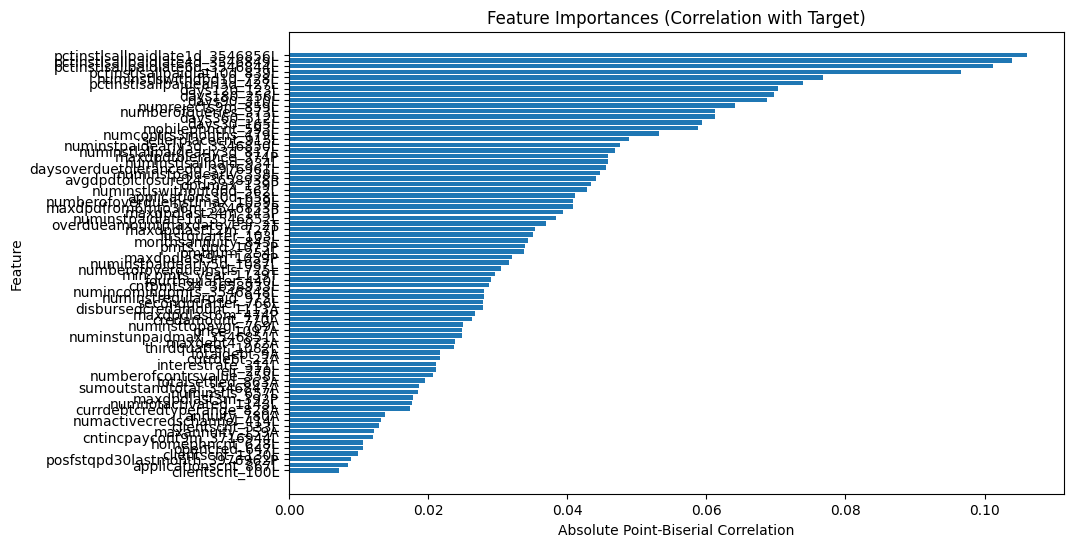

In [66]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.head(max_num_fetures)['feature'], feature_importances.head(max_num_fetures)['importance'])
plt.xlabel('Absolute Point-Biserial Correlation')
plt.ylabel('Feature')
plt.title('Feature Importances (Correlation with Target)')
plt.gca().invert_yaxis()
plt.show()

In [67]:
best_numeric_cols = feature_importances.head(max_num_fetures)['feature'].to_numpy()
best_numeric_cols

array(['pctinstlsallpaidlate1d_3546856L',
       'pctinstlsallpaidlate4d_3546849L',
       'pctinstlsallpaidlate6d_3546844L', 'pctinstlsallpaidlat10d_839L',
       'numinstlswithdpd10_728L', 'pctinstlsallpaidearl3d_427L',
       'days120_123L', 'days180_256L', 'days90_310L', 'numrejects9m_859L',
       'numberofqueries_373L', 'days360_512L', 'days30_165L',
       'mobilephncnt_593L', 'numcontrs3months_479L',
       'sellerplacecnt_915L', 'numinstpaidearly3d_3546850L',
       'numinstlallpaidearly3d_817L', 'maxdpdtolerance_374P',
       'numinstlsallpaid_934L', 'daysoverduetolerancedd_3976961L',
       'numinstpaidearly_338L', 'avgdpdtolclosure24_3658938P',
       'dpdmax_139P', 'numinstlswithoutdpd_562L', 'applications30d_658L',
       'numberofoverdueinstlmax_1039L', 'maxdpdfrom6mto36m_3546853P',
       'maxdpdlast24m_143P', 'numinstpaidlate1d_3546852L',
       'overdueamountmaxdateyear_2T', 'maxdpdlast12m_727P',
       'firstquarter_103L', 'monthsannuity_845L', 'pmts_dpd_1073P',
    

In [68]:
df_train[categorical_cols].select([pl.col(col).n_unique().alias(col) for col in categorical_cols])

classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,financialinstitution_382M,financialinstitution_591M,purposeofcred_426M,purposeofcred_874M,subjectrole_182M,subjectrole_93M,collater_typofvalofguarant_298M,collaterals_typeofguarante_669M,subjectroles_name_838M,contaddr_district_15M,education_927M,empladdr_district_926M,language1_981M,registaddr_district_1083M,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastcancelreason_561M,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectreason_759M,lastrejectreasonclient_4145040M,previouscontdistrict_112M,description_5085714M,education_1103M,education_88M,maritalst_385M,maritalst_893M,incometype_1044T,role_1084L,sex_738L,credtype_322L,disbursementtype_67L,inittransactioncode_186L,isbidproduct_1095L,paytype1st_925L,paytype_783L,lastst_736L,twobodfilling_608L
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
11,301,47,198,274,181,19,21,8,6,5,15,9,975,6,223,3,991,45,214,74,45,187,18,14,223,2,5,5,6,6,9,2,2,3,3,3,2,1,1,11,2


In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

label_encoder = LabelEncoder()
encoded_columns = {}
for col in categorical_cols:
    encoded_columns[col] = label_encoder.fit_transform(df_train[col].to_list())

encoded_df = pl.DataFrame(encoded_columns)
encoded_df = encoded_df.with_columns(df_train['target'])

In [70]:
X = encoded_df.drop('target').to_numpy()
y = encoded_df['target'].to_numpy()

chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)

chi2_scores = pl.DataFrame({
    'Feature': encoded_df.drop('target').columns,
    'Chi2 Score': chi2_selector.scores_,
    'Unique': encoded_df.select([pl.col(col).n_unique().alias(col) for col in categorical_cols]).to_numpy()[0]
}).sort('Chi2 Score', descending=True)

In [71]:
chi2_scores = chi2_scores.filter(
   pl.all_horizontal(pl.col(pl.Float32, pl.Float64).is_not_nan())
)
chi2_scores.to_pandas()

,Feature,Chi2 Score,Unique
0,empladdr_district_926M,17271.000357,223
1,classificationofcontr_400M,4832.616642,301
2,lastrejectreason_759M,3408.559876,18
3,lastrejectcommoditycat_161M,1919.801911,45
4,previouscontdistrict_112M,1672.144162,223
5,incometype_1044T,1298.126176,9
6,sex_738L,1285.047232,2
7,lastcancelreason_561M,1038.164130,74
8,language1_981M,507.849279,3
9,contractst_545M,475.841498,47


In [72]:
max_num_fetures = 25

best_categorical_cols = chi2_scores.head(max_num_fetures)['Feature'].to_numpy()
best_categorical_cols

array(['empladdr_district_926M', 'classificationofcontr_400M',
       'lastrejectreason_759M', 'lastrejectcommoditycat_161M',
       'previouscontdistrict_112M', 'incometype_1044T', 'sex_738L',
       'lastcancelreason_561M', 'language1_981M', 'contractst_545M',
       'lastst_736L', 'lastrejectreasonclient_4145040M', 'role_1084L',
       'maritalst_385M', 'purposeofcred_874M',
       'lastapprcommoditycat_1041M', 'contractst_964M',
       'lastapprcommoditytypec_5251766M', 'classificationofcontr_13M',
       'description_5085714M', 'financialinstitution_591M',
       'contaddr_district_15M', 'education_1103M',
       'inittransactioncode_186L', 'isbidproduct_1095L'], dtype=object)

In [73]:
df_train[best_categorical_cols]

empladdr_district_926M,classificationofcontr_400M,lastrejectreason_759M,lastrejectcommoditycat_161M,previouscontdistrict_112M,incometype_1044T,sex_738L,lastcancelreason_561M,language1_981M,contractst_545M,lastst_736L,lastrejectreasonclient_4145040M,role_1084L,maritalst_385M,purposeofcred_874M,lastapprcommoditycat_1041M,contractst_964M,lastapprcommoditytypec_5251766M,classificationofcontr_13M,description_5085714M,financialinstitution_591M,contaddr_district_15M,education_1103M,inittransactioncode_186L,isbidproduct_1095L
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""P142_57_166""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""SALARIED_GOVT""","""F""","""a55475b1""","""P10_39_147""","""7241344e""","""D""","""a55475b1""","""CL""","""a55475b1""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""ea6782cc""","""a55475b1""","""P204_66_73""","""P88_18_84""","""a55475b1""","""CASH""","""false"""
"""P49_46_174""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""SALARIED_GOVT""","""M""","""a55475b1""","""P10_39_147""","""7241344e""","""D""","""a55475b1""","""CL""","""a55475b1""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""ea6782cc""","""a55475b1""","""P204_66_73""","""P103_93_94""","""a55475b1""","""CASH""","""false"""
"""P63_14_24""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""EMPLOYED""","""F""","""a55475b1""","""P10_39_147""","""7241344e""","""D""","""a55475b1""","""EM""","""a55475b1""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""ea6782cc""","""a55475b1""","""P204_66_73""","""P91_125_184""","""a55475b1""","""CASH""","""false"""
"""P131_33_167""","""ea6782cc""","""P94_109_143""","""a55475b1""","""a55475b1""","""EMPLOYED""","""F""","""P94_109_143""","""P10_39_147""","""7241344e""","""D""","""a55475b1""","""CL""","""a55475b1""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""ea6782cc""","""a55475b1""","""P204_66_73""","""P155_139_77""","""a55475b1""","""CASH""","""false"""
"""P62_144_102""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""EMPLOYED""","""F""","""P24_27_36""","""P10_39_147""","""7241344e""","""T""","""a55475b1""","""CL""","""a55475b1""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""ea6782cc""","""a55475b1""","""P204_66_73""","""P194_82_174""","""a55475b1""","""CASH""","""false"""
"""P54_133_26""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""PRIVATE_SECTOR…","""F""","""P85_114_140""","""P209_127_106""","""7241344e""","""T""","""a55475b1""","""CL""","""a55475b1""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""ea6782cc""","""a55475b1""","""P204_66_73""","""P54_133_26""","""a55475b1""","""NDF""","""false"""
"""P82_154_182""","""ea6782cc""","""P94_109_143""","""a55475b1""","""a55475b1""","""EMPLOYED""","""F""","""P94_109_143""","""P10_39_147""","""7241344e""","""D""","""a55475b1""","""CL""","""a55475b1""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""ea6782cc""","""a55475b1""","""P204_66_73""","""P82_154_182""","""a55475b1""","""CASH""","""false"""
"""P54_133_26""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""SALARIED_GOVT""","""F""","""a55475b1""","""P209_127_106""","""7241344e""","""D""","""a55475b1""","""EM""","""a55475b1""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""ea6782cc""","""a55475b1""","""P204_66_73""","""P170_34_169""","""a55475b1""","""NDF""","""false"""
"""P109_162_152""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""EMPLOYED""","""M""","""a55475b1""","""P10_39_147""","""7241344e""","""D""","""a55475b1""","""EM""","""a55475b1""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""ea6782cc""","""a55475b1""","""P204_66_73""","""P93_57_167""","""a55475b1""","""CASH""","""false"""


In [74]:
bad_cat_cols = [col for col in categorical_cols if col not in best_categorical_cols]

df_train = df_train.drop(bad_cat_cols)

In [75]:
top_scores = chi2_scores.head(max_num_fetures).to_pandas()
cols_to_onehot = top_scores[top_scores['Unique'] <= 15 ]['Feature'].to_numpy()
cols_to_onehot

array(['incometype_1044T', 'sex_738L', 'language1_981M', 'lastst_736L',
       'lastrejectreasonclient_4145040M', 'role_1084L', 'maritalst_385M',
       'classificationofcontr_13M', 'description_5085714M',
       'education_1103M', 'inittransactioncode_186L',
       'isbidproduct_1095L'], dtype=object)

In [76]:
other_encode = [col for col in best_categorical_cols if col not in cols_to_onehot]
other_encode

['empladdr_district_926M',
 'classificationofcontr_400M',
 'lastrejectreason_759M',
 'lastrejectcommoditycat_161M',
 'previouscontdistrict_112M',
 'lastcancelreason_561M',
 'contractst_545M',
 'purposeofcred_874M',
 'lastapprcommoditycat_1041M',
 'contractst_964M',
 'lastapprcommoditytypec_5251766M',
 'financialinstitution_591M',
 'contaddr_district_15M']

In [77]:
df_train[other_encode]

empladdr_district_926M,classificationofcontr_400M,lastrejectreason_759M,lastrejectcommoditycat_161M,previouscontdistrict_112M,lastcancelreason_561M,contractst_545M,purposeofcred_874M,lastapprcommoditycat_1041M,contractst_964M,lastapprcommoditytypec_5251766M,financialinstitution_591M,contaddr_district_15M
str,str,str,str,str,str,str,str,str,str,str,str,str
"""P142_57_166""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""7241344e""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""P204_66_73""","""P88_18_84"""
"""P49_46_174""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""7241344e""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""P204_66_73""","""P103_93_94"""
"""P63_14_24""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""7241344e""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""P204_66_73""","""P91_125_184"""
"""P131_33_167""","""ea6782cc""","""P94_109_143""","""a55475b1""","""a55475b1""","""P94_109_143""","""7241344e""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""P204_66_73""","""P155_139_77"""
"""P62_144_102""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""P24_27_36""","""7241344e""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""P204_66_73""","""P194_82_174"""
"""P54_133_26""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""P85_114_140""","""7241344e""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""P204_66_73""","""P54_133_26"""
"""P82_154_182""","""ea6782cc""","""P94_109_143""","""a55475b1""","""a55475b1""","""P94_109_143""","""7241344e""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""P204_66_73""","""P82_154_182"""
"""P54_133_26""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""7241344e""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""P204_66_73""","""P170_34_169"""
"""P109_162_152""","""ea6782cc""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""","""7241344e""","""5065c2b8""","""a55475b1""","""7241344e""","""a55475b1""","""P204_66_73""","""P93_57_167"""


In [78]:
df_train = df_train.to_pandas()

In [79]:
for col in other_encode:
    frequency_map = df_train[col].value_counts(normalize=True)
    df_train[col] = df_train[col].map(frequency_map)
    print(F'{col} done')

empladdr_district_926M done
classificationofcontr_400M done
lastrejectreason_759M done
lastrejectcommoditycat_161M done
previouscontdistrict_112M done
lastcancelreason_561M done
contractst_545M done
purposeofcred_874M done
lastapprcommoditycat_1041M done
contractst_964M done
lastapprcommoditytypec_5251766M done
financialinstitution_591M done
contaddr_district_15M done


In [80]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False, drop=None)
encoded_features = one_hot_encoder.fit_transform(df_train[cols_to_onehot])

encoded_feature_names = one_hot_encoder.get_feature_names_out(cols_to_onehot)

encoded_df = pl.DataFrame(encoded_features, schema=encoded_feature_names.tolist()).to_pandas()

# Concatenate the encoded columns with the original DataFrame
other_cols = [col for col in df_train.columns if col not in cols_to_onehot]
df_train = pd.concat([df_train[other_cols], encoded_df], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [81]:
df_train.head()

,case_id,date_decision,MONTH,WEEK_NUM,target,classificationofcontr_400M,contractst_545M,contractst_964M,debtoutstand_525A,debtoverdue_47A,...,education_1103M_39a0853f,education_1103M_6b2ae0fa,education_1103M_717ddd49,education_1103M_a55475b1,education_1103M_c8e1a1d0,inittransactioncode_186L_CASH,inittransactioncode_186L_NDF,inittransactioncode_186L_POS,isbidproduct_1095L_false,isbidproduct_1095L_true
0,0.0,2019-01-03,201901.0,0.0,0.0,0.433616,0.893493,0.684651,202230.0625,2587.659912,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,2019-01-03,201901.0,0.0,0.0,0.433616,0.893493,0.684651,202230.0625,2587.659912,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2.0,2019-01-04,201901.0,0.0,0.0,0.433616,0.893493,0.684651,202230.0625,2587.659912,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3.0,2019-01-03,201901.0,0.0,0.0,0.433616,0.893493,0.684651,202230.0625,2587.659912,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,4.0,2019-01-04,201901.0,0.0,1.0,0.433616,0.893493,0.684651,202230.0625,2587.659912,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


# Train

In [82]:
feature_cols = [col for col in df_train.columns if col not in train_base.columns] 
len(feature_cols)

204

In [83]:
from sklearn.model_selection import train_test_split

df_train = pl.from_pandas(df_train)
case_ids = df_train["case_id"].unique().shuffle(seed=1)
case_ids_train, case_ids_test = train_test_split(case_ids, train_size=0.6, random_state=1)
case_ids_valid, case_ids_test = train_test_split(case_ids_test, train_size=0.5, random_state=1)

def create_train_valid(case_ids: pl.DataFrame) -> pl.DataFrame:
    return (
        df_train.filter(pl.col("case_id").is_in(case_ids))[["case_id", "WEEK_NUM", "target"]].to_pandas(),
        df_train.filter(pl.col("case_id").is_in(case_ids))[feature_cols].to_pandas(),
        df_train.filter(pl.col("case_id").is_in(case_ids))["target"].to_pandas()
    )

base_train, X_train, y_train = create_train_valid(case_ids_train)
base_valid, X_valid, y_valid = create_train_valid(case_ids_valid)
base_test, X_test, y_test = create_train_valid(case_ids_test)

In [84]:
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "max_depth": 3,
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "n_estimators": 1500,
    "verbose": -1,
}

gbm = lgb.train(
    params,
    lgb_train,
    valid_sets=lgb_valid,
    callbacks=[lgb.log_evaluation(50), lgb.early_stopping(10)]
)

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 10 rounds
[50]	valid_0's auc: 0.783963
[100]	valid_0's auc: 0.804597
[150]	valid_0's auc: 0.812983
[200]	valid_0's auc: 0.817676
[250]	valid_0's auc: 0.820819
[300]	valid_0's auc: 0.822685
[350]	valid_0's auc: 0.824339
[400]	valid_0's auc: 0.825365
[450]	valid_0's auc: 0.826236
[500]	valid_0's auc: 0.826935
[550]	valid_0's auc: 0.827481
[600]	valid_0's auc: 0.8282
[650]	valid_0's auc: 0.828839
[700]	valid_0's auc: 0.829516
[750]	valid_0's auc: 0.829916
[800]	valid_0's auc: 0.830291
[850]	valid_0's auc: 0.830634
[900]	valid_0's auc: 0.830779
Early stopping, best iteration is:
[894]	valid_0's auc: 0.83082


In [85]:
for base, X in [(base_train, X_train), (base_valid, X_valid), (base_test, X_test)]:
    y_pred = gbm.predict(X, num_iteration=gbm.best_iteration)
    base["score"] = y_pred

print(f'The AUC score on the train set is: {roc_auc_score(base_train["target"], base_train["score"])}') 
print(f'The AUC score on the valid set is: {roc_auc_score(base_valid["target"], base_valid["score"])}') 
print(f'The AUC score on the test set is: {roc_auc_score(base_test["target"], base_test["score"])}')  

The AUC score on the train set is: 0.8410951646528
The AUC score on the valid set is: 0.8308195785401997
The AUC score on the test set is: 0.8310289866909085


In [86]:
def gini_stability(base, w_fallingrate=88.0, w_resstd=-0.5):
    gini_in_time = base.loc[:, ["WEEK_NUM", "target", "score"]]\
        .sort_values("WEEK_NUM")\
        .groupby("WEEK_NUM")[["target", "score"]]\
        .apply(lambda x: 2*roc_auc_score(x["target"], x["score"])-1).tolist()
    
    x = np.arange(len(gini_in_time))
    y = gini_in_time
    a, b = np.polyfit(x, y, 1)
    y_hat = a*x + b
    residuals = y - y_hat
    res_std = np.std(residuals)
    avg_gini = np.mean(gini_in_time)
    return avg_gini + w_fallingrate * min(0, a) + w_resstd * res_std

stability_score_train = gini_stability(base_train)
stability_score_valid = gini_stability(base_valid)
stability_score_test = gini_stability(base_test)

print(f'The stability score on the train set is: {stability_score_train}') 
print(f'The stability score on the valid set is: {stability_score_valid}') 
print(f'The stability score on the test set is: {stability_score_test}')  

The stability score on the train set is: 0.658618041772557
The stability score on the valid set is: 0.6338298051312914
The stability score on the test set is: 0.6271963809624913


In [87]:
selected_cols = np.concatenate([train_base.columns[:-1], best_numeric_cols, best_categorical_cols])
selected_cols

array(['case_id', 'date_decision', 'MONTH', 'WEEK_NUM',
       'pctinstlsallpaidlate1d_3546856L',
       'pctinstlsallpaidlate4d_3546849L',
       'pctinstlsallpaidlate6d_3546844L', 'pctinstlsallpaidlat10d_839L',
       'numinstlswithdpd10_728L', 'pctinstlsallpaidearl3d_427L',
       'days120_123L', 'days180_256L', 'days90_310L', 'numrejects9m_859L',
       'numberofqueries_373L', 'days360_512L', 'days30_165L',
       'mobilephncnt_593L', 'numcontrs3months_479L',
       'sellerplacecnt_915L', 'numinstpaidearly3d_3546850L',
       'numinstlallpaidearly3d_817L', 'maxdpdtolerance_374P',
       'numinstlsallpaid_934L', 'daysoverduetolerancedd_3976961L',
       'numinstpaidearly_338L', 'avgdpdtolclosure24_3658938P',
       'dpdmax_139P', 'numinstlswithoutdpd_562L', 'applications30d_658L',
       'numberofoverdueinstlmax_1039L', 'maxdpdfrom6mto36m_3546853P',
       'maxdpdlast24m_143P', 'numinstpaidlate1d_3546852L',
       'overdueamountmaxdateyear_2T', 'maxdpdlast12m_727P',
       'firstqua

In [88]:
df_test = df_test[selected_cols].to_pandas()
df_test

,case_id,date_decision,MONTH,WEEK_NUM,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pctinstlsallpaidlat10d_839L,numinstlswithdpd10_728L,pctinstlsallpaidearl3d_427L,...,lastapprcommoditycat_1041M,contractst_964M,lastapprcommoditytypec_5251766M,classificationofcontr_13M,description_5085714M,financialinstitution_591M,contaddr_district_15M,education_1103M,inittransactioncode_186L,isbidproduct_1095L
0,57543,2021-05-14,202201,100,0.32292,0.07292,0.05208,0.00000,0.0,0.35417,...,a55475b1,7241344e,a55475b1,ea6782cc,2fc785b2,b619fa46,P107_155_111,6b2ae0fa,CASH,True
1,57549,2022-01-17,202201,100,0.29545,0.18605,0.13953,0.11628,15.0,0.34091,...,a55475b1,7241344e,a55475b1,ea6782cc,2fc785b2,b619fa46,a55475b1,39a0853f,CASH,True
2,57551,2020-11-27,202201,100,0.11111,0.11111,0.00000,0.00000,0.0,0.33333,...,a55475b1,7241344e,a55475b1,ea6782cc,2fc785b2,b619fa46,P11_36_178,6b2ae0fa,POS,False
3,57552,2020-11-27,202201,100,0.00000,0.00000,0.00000,0.00000,0.0,0.83871,...,a55475b1,None,a55475b1,None,2fc785b2,None,P21_84_40,a55475b1,CASH,True
4,57569,2021-12-20,202201,100,0.66667,0.66667,0.60000,0.60000,36.0,0.33333,...,a55475b1,None,a55475b1,None,2fc785b2,None,P121_131_159,717ddd49,CASH,True
5,57630,2021-03-16,202201,100,0.28571,0.00000,0.00000,0.00000,0.0,0.42857,...,P148_110_5,None,P161_88_182,None,2fc785b2,None,P49_110_166,6b2ae0fa,POS,False
6,57631,2022-06-04,202201,100,NaN,NaN,NaN,NaN,NaN,NaN,...,a55475b1,None,a55475b1,None,2fc785b2,None,None,a55475b1,POS,False
7,57632,2022-02-05,202201,100,0.00000,0.00000,0.00000,0.00000,0.0,1.00000,...,P53_45_92,None,P200_75_140,None,2fc785b2,None,None,a55475b1,POS,False
8,57633,2022-01-25,202201,100,NaN,NaN,NaN,NaN,NaN,NaN,...,a55475b1,7241344e,a55475b1,ea6782cc,2fc785b2,b619fa46,None,a55475b1,CASH,False
9,57634,2021-01-27,202201,100,0.00000,0.00000,0.00000,0.00000,0.0,0.40000,...,P159_130_59,None,P174_113_42,None,2fc785b2,None,None,a55475b1,POS,False


In [89]:
one_hot_encoder = OneHotEncoder(sparse=False, drop=None)
encoded_features = one_hot_encoder.fit_transform(df_test[cols_to_onehot])

encoded_feature_names = one_hot_encoder.get_feature_names_out(cols_to_onehot)

encoded_df = pl.DataFrame(encoded_features, schema=encoded_feature_names.tolist()).to_pandas()

# Concatenate the encoded columns with the original DataFrame
other_cols = [col for col in df_test.columns if col not in cols_to_onehot]
df_test = pd.concat([df_test[other_cols], encoded_df], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [90]:
for col in other_encode:
    frequency_map = df_test[col].value_counts(normalize=True)
    df_test[col] = df_test[col].map(frequency_map)
    print(F'{col} done')

empladdr_district_926M done
classificationofcontr_400M done
lastrejectreason_759M done
lastrejectcommoditycat_161M done
previouscontdistrict_112M done
lastcancelreason_561M done
contractst_545M done
purposeofcred_874M done
lastapprcommoditycat_1041M done
contractst_964M done
lastapprcommoditytypec_5251766M done
financialinstitution_591M done
contaddr_district_15M done


In [91]:
missing_cols = [col for col in df_train.columns if col not in df_test.columns][1:]
missing_cols

['debtoutstand_525A',
 'debtoverdue_47A',
 'monthlyinstlamount_332A',
 'numberofcontrsvalue_258L',
 'overdueamount_659A',
 'overdueamountmax2_14A',
 'overdueamountmax_155A',
 'overdueamountmaxdatemonth_365T',
 'totaldebtoverduevalue_178A',
 'totaldebtoverduevalue_718A',
 'totaloutstanddebtvalue_39A',
 'collater_valueofguarantee_1124L',
 'pmts_overdue_1140A',
 'max_pmts_year_1139T',
 'num_of_contracts',
 'mainoccupationinc_384A',
 'actualdpdtolerance_344P',
 'annuitynextmonth_57A',
 'applicationcnt_361L',
 'applicationscnt_1086L',
 'applicationscnt_464L',
 'applicationscnt_629L',
 'clientscnt12m_3712952L',
 'clientscnt3m_3712950L',
 'clientscnt6m_3712949L',
 'clientscnt_1022L',
 'clientscnt_1071L',
 'clientscnt_157L',
 'clientscnt_257L',
 'clientscnt_304L',
 'clientscnt_360L',
 'clientscnt_493L',
 'clientscnt_887L',
 'clientscnt_946L',
 'commnoinclast6m_3546845L',
 'deferredmnthsnum_166L',
 'downpmt_116A',
 'lastapprcredamount_781A',
 'mastercontrelectronic_519L',
 'mastercontrexist_109

In [92]:
modes = {col: calculate_mode(col) for col in missing_cols}
modes

{'debtoutstand_525A': 0.0,
 'debtoverdue_47A': 0.0,
 'monthlyinstlamount_332A': 0.0,
 'numberofcontrsvalue_258L': 1.0,
 'overdueamount_659A': 0.0,
 'overdueamountmax2_14A': 0.0,
 'overdueamountmax_155A': 0.0,
 'overdueamountmaxdatemonth_365T': 8.229732513427734,
 'totaldebtoverduevalue_178A': 0.0,
 'totaldebtoverduevalue_718A': 0.0,
 'totaloutstanddebtvalue_39A': 216288.390625,
 'collater_valueofguarantee_1124L': 0.0,
 'pmts_overdue_1140A': 0.0,
 'max_pmts_year_1139T': 2020.0,
 'num_of_contracts': 1.0,
 'mainoccupationinc_384A': 40000.0,
 'actualdpdtolerance_344P': 0.0,
 'annuitynextmonth_57A': 0.0,
 'applicationcnt_361L': 0.0,
 'applicationscnt_1086L': 0.0,
 'applicationscnt_464L': 0.0,
 'applicationscnt_629L': 0.0,
 'clientscnt12m_3712952L': 0.0,
 'clientscnt3m_3712950L': 0.0,
 'clientscnt6m_3712949L': 0.0,
 'clientscnt_1022L': 0.0,
 'clientscnt_1071L': 0.0,
 'clientscnt_157L': 0.0,
 'clientscnt_257L': 0.0,
 'clientscnt_304L': 0.0,
 'clientscnt_360L': 0.0,
 'clientscnt_493L': 0.0,
 '

In [93]:
for column in missing_cols:
    df_test[column] = modes[column]

/tmp/ipykernel_839/91193162.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[column] = modes[column]
/tmp/ipykernel_839/91193162.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[column] = modes[column]
/tmp/ipykernel_839/91193162.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

In [94]:
df_train.to_pandas().dtypes

case_id                                        float64
date_decision                                   object
MONTH                                          float64
WEEK_NUM                                       float64
target                                         float64
classificationofcontr_400M                     float64
contractst_545M                                float64
contractst_964M                                float64
debtoutstand_525A                              float32
debtoverdue_47A                                float32
dpdmax_139P                                    float32
financialinstitution_591M                      float64
monthlyinstlamount_332A                        float32
numberofcontrsvalue_258L                       float32
numberofcontrsvalue_358L                       float32
numberofoverdueinstlmax_1039L                  float32
numberofoverdueinstls_725L                     float32
overdueamount_659A                             float32
overdueamo

In [95]:
df_test[feature_cols].dtypes

classificationofcontr_400M                     float64
contractst_545M                                float64
contractst_964M                                float64
debtoutstand_525A                              float64
debtoverdue_47A                                float64
dpdmax_139P                                    float64
financialinstitution_591M                      float64
monthlyinstlamount_332A                        float64
numberofcontrsvalue_258L                       float64
numberofcontrsvalue_358L                       float64
numberofoverdueinstlmax_1039L                  float64
numberofoverdueinstls_725L                     float64
overdueamount_659A                             float64
overdueamountmax2_14A                          float64
overdueamountmax_155A                          float64
overdueamountmaxdatemonth_365T                 float64
overdueamountmaxdateyear_2T                    float64
purposeofcred_874M                             float64
totaldebto

In [96]:
X_submission = df_test[feature_cols]

In [97]:
need_to_convert = X_submission.columns[X_submission.dtypes == 'object'].tolist()
need_to_convert

['pmts_dpd_1073P', 'min_pmts_year_1139T']

In [98]:
X_submission[need_to_convert] = X_submission[need_to_convert].astype(float)

/tmp/ipykernel_839/3909046342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_submission[need_to_convert] = X_submission[need_to_convert].astype(float)


In [99]:
y_submission_pred = gbm.predict(X_submission, num_iteration=gbm.best_iteration)

In [100]:
y_submission_pred

array([0.00833533, 0.03368746, 0.00413505, 0.0116715 , 0.06550097,
       0.02301997, 0.14760951, 0.01093661, 0.04955158, 0.02055343])

In [101]:
submission = pd.DataFrame({
    "case_id": df_test["case_id"].to_numpy(),
    "score": y_submission_pred
}).set_index('case_id')
submission.to_csv("./submission.csv")